# Temperature Forecast

### Problem Statement:
#### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017

**Attribute Information:**

(Local Data Assimilation and Prediction System - (LDAPS) Model)

For more information, read [Cho et al, 2020].

- station - used weather station number: 1 to 25
Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- lat - Latitude (Â°): 37.456 to 37.645
- lon - Longitude (Â°): 126.826 to 127.135
-DEM - Elevation (m): 12.4 to 212.3
- Slope - Slope (Â°): 0.1 to 5.2
- Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
**Please note that there are two target variables here:**

1)Next_Tmax: Next day maximum temperature.

2)Next_Tmin: Next day minimum temperature.

## importing labraries

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

# Importing Temperature Forecast dataset Csv file

In [2]:
df=pd.read_csv('temperature.csv') # Loading Dataset

In [3]:
df.head()  # top five record of Dataset

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.shape[0]  # Gives the No of rows in Data set


7752

In [5]:
df.shape[1] # Give the no of columns in data set

25

In [6]:
df.shape # or use this also provide no of rows and columns

(7752, 25)

In [7]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [8]:
df.info()  # checking Dataset Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


### Comment :
- All variable are Numerical in nature.
- Next_Tmax and Next_Tmin are Target Variable.
- This dataset contain 7752 Rows and 25 Columns.

In [9]:
# Sort columns by datatypes
# df.columns.to_series().groupby(df.dtypes).groups

## Checking Missing Value

In [10]:
df.isnull().sum().sort_values(ascending=False) # Checking missing value asscending order

LDAPS_RHmin         75
LDAPS_WS            75
LDAPS_Tmin_lapse    75
LDAPS_Tmax_lapse    75
LDAPS_RHmax         75
LDAPS_CC3           75
LDAPS_CC2           75
LDAPS_CC1           75
LDAPS_LH            75
LDAPS_PPT4          75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_CC4           75
Present_Tmin        70
Present_Tmax        70
Next_Tmin           27
Next_Tmax           27
station              2
Date                 2
lat                  0
DEM                  0
lon                  0
Solar radiation      0
Slope                0
dtype: int64

In [11]:
(df.isnull().sum().sort_values(ascending=False)/ len(df))*100

LDAPS_RHmin         0.967492
LDAPS_WS            0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_RHmax         0.967492
LDAPS_CC3           0.967492
LDAPS_CC2           0.967492
LDAPS_CC1           0.967492
LDAPS_LH            0.967492
LDAPS_PPT4          0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_CC4           0.967492
Present_Tmin        0.902993
Present_Tmax        0.902993
Next_Tmin           0.348297
Next_Tmax           0.348297
station             0.025800
Date                0.025800
lat                 0.000000
DEM                 0.000000
lon                 0.000000
Solar radiation     0.000000
Slope               0.000000
dtype: float64

**As missing values present are less than 1%. So We can directly drop these missing values.**

In [12]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


## Comment :
- Finally, No Missing Value is Present.

**Here we could see Date Datatypes in Date we can change into date, month and year format**

In [13]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

- Now to gain more insight in data, we will create additional columns with location of station in terms of city and respective state.

In [14]:
# Importing Reverse geocoder
!pip install reverse_geocoder
import reverse_geocoder as rg
import pprint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268063 sha256=335cc3e31dc59461538e45afadf5a0c2f567b2614dfd7031e046e884410827af
  Stored in directory: /root/.cache/pip/wheels/bd/e5/88/eb139b6d6a26b8022d370ab991f7a836802fed9871975ec6d9
Successfully built reverse_geocoder


In [15]:
geodata = []

# Define a function to perform reverse geocoding
def reverse_geocoordinates(coordinates):
    # Search for geographical information based on coordinates
    results = rg.search(coordinates)
    return results

# Main function
if __name__ == "__main__":
    # Create a list of coordinates by zipping latitude and longitude columns from DataFrame df
    coordinates = list(zip(df['lat'], df['lon']))

    # Call the reverse_geocoordinates function to perform reverse geocoding
    # and store the results in the data variable
    data = reverse_geocoordinates(coordinates)

    # Append the results to the geodata list
    geodata.append(data)

# Create a DataFrame for geographical names
geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


**We have gather state and city name as per corresponding to it's latitude and longitude available. Now it is time incorporate state and city columns in our dataset.**

In [16]:
# Add a new column 'State' to the DataFrame df, extracting state information from geo_names
df['State'] = geo_names[0].apply(lambda x: x.get('admin1'))

# Add a new column 'City' to the DataFrame df, extracting city information from geo_names
df['City'] = geo_names[0].apply(lambda x: x.get('name'))

In [17]:
df.columns # We could see here clearly added the state and city columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day',
       'Month', 'Year', 'State', 'City'],
      dtype='object')

In [18]:
df.head() # reconforming again

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...       DEM  \
0         28.074101         23.006936  6.818887   69.451805  ...  212.3350   
1         29.850689         24.035009  5.691890   51.937448  ...   44.7624   
2         30.091292         24.565633  6.138224   20.573050  ...   33.3068   
3         29.704629         23.326177  5.650050   65.727144  ...   45.7160   
4         29.113934         23.486480  5.735004  107.965535  ...   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  \
0  2.7850      5992.895996       29.1       21.2   30      6  2013   
1  0.5141      5869.312500       30.5       22.5   30      6  2013   
2  0.2661      5863.555664       31.1       23.9   30      6  2013   
3  2.5348      5856.964844       31.7       24.3   30      6  2013   
4  0.5055      5859.552246       31.2       22.5   30      6  2013   

         State     City  
0        Seoul    Seoul  
1        Seoul    Seoul  
2        Seoul    Seoul  
3        Seoul    Seoul  
4  Gyeonggi-do  Guri-si  

[5 rows x 30 columns]

In [19]:
# Statistical summary of the numerical columns
df.describe().T

count                           mean                  min  \
station           7588.0                      13.014101                  1.0   
Date                7588  2015-07-27 18:22:12.208750592  2013-06-30 00:00:00   
Present_Tmax      7588.0                      29.748366                 20.0   
Present_Tmin      7588.0                      23.195809                 11.3   
LDAPS_RHmin       7588.0                      56.724969            19.794666   
LDAPS_RHmax       7588.0                      88.360823            58.936283   
LDAPS_Tmax_lapse  7588.0                      29.620128            17.624954   
LDAPS_Tmin_lapse  7588.0                      23.511786            14.272646   
LDAPS_WS          7588.0                       7.094097              2.88258   
LDAPS_LH          7588.0                      62.492606           -13.603212   
LDAPS_CC1         7588.0                        0.36851                  0.0   
LDAPS_CC2         7588.0                       0.355528                  0.0   
LDAPS_CC3         7588.0                       0.317546                  0.0   
LDAPS_CC4         7588.0                       0.298268                  0.0   
LDAPS_PPT1        7588.0                       0.589008                  0.0   
LDAPS_PPT2        7588.0                       0.480738                  0.0   
LDAPS_PPT3        7588.0                       0.275007                  0.0   
LDAPS_PPT4        7588.0                       0.265373                  0.0   
lat               7588.0                      37.544792              37.4562   
lon               7588.0                      126.99142              126.826   
DEM               7588.0                      61.918136                12.37   
Slope             7588.0                       1.259755               0.0985   
Solar radiation   7588.0                    5343.724208          4329.520508   
Next_Tmax         7588.0                      30.241526                 17.4   
Next_Tmin         7588.0                       22.91082                 11.3   
Day               7588.0                       15.93951                  1.0   
Month             7588.0                       7.465999                  6.0   
Year              7588.0                    2014.991697               2013.0   

                                  25%                  50%  \
station                           7.0                 13.0   
Date              2014-07-15 00:00:00  2015-07-29 00:00:00   
Present_Tmax                     27.8                 29.9   
Present_Tmin                     21.6                 23.4   
LDAPS_RHmin                 45.960243            55.023199   
LDAPS_RHmax                 84.203724            89.784122   
LDAPS_Tmax_lapse            27.673756            29.709537   
LDAPS_Tmin_lapse             22.08682            23.758249   
LDAPS_WS                     5.675358             6.547838   
LDAPS_LH                    37.206201            56.898324   
LDAPS_CC1                    0.146546             0.315706   
LDAPS_CC2                    0.140324             0.311676   
LDAPS_CC3                     0.10095             0.261795   
LDAPS_CC4                    0.081495             0.227459   
LDAPS_PPT1                        0.0                  0.0   
LDAPS_PPT2                        0.0                  0.0   
LDAPS_PPT3                        0.0                  0.0   
LDAPS_PPT4                        0.0                  0.0   
lat                           37.5102              37.5507   
lon                           126.937              126.995   
DEM                              28.7               45.716   
Slope                          0.2713                0.618   
Solar radiation           5001.485717          5441.987305   
Next_Tmax                        28.2                 30.4   
Next_Tmin                        21.3                 23.1   
Day                               8.0                 16.0   
Month                   

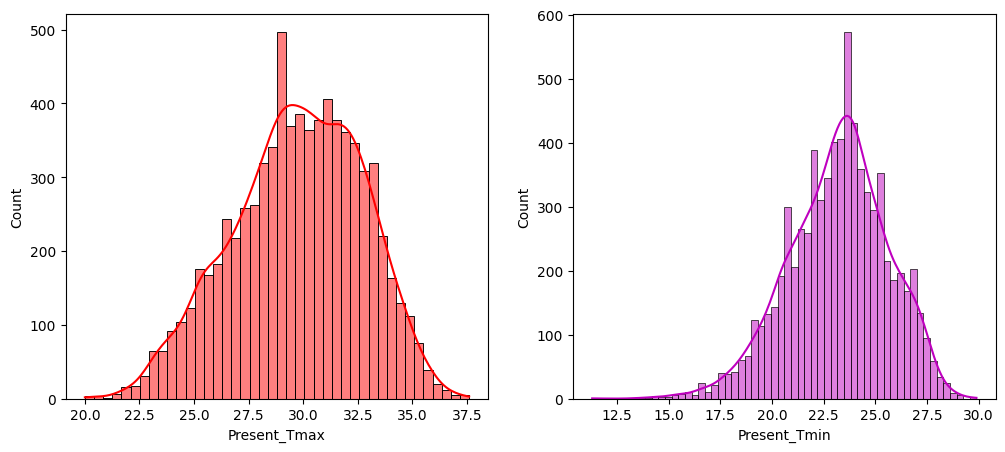

In [20]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

## Comment:
For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.
For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.
## Lets find out maximum and minimum Temperature over period

In [21]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377437


**Checking where actually these minima and maxima occur**

In [22]:
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-08-11          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
5717      5082.563477       37.0       27.8   11      8  2016  Gyeonggi-do   

            City  
5717  Bucheon-si

In [23]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year State City  
7725       4614.76123       23.8       15.1   30      8  2017   NaN  NaN

In [24]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-08-02          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
2397      5360.226563       31.3       24.8    2      8  2014  Gyeonggi-do   

         City  
2397  Guri-si

In [25]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  State   City  
6116      4539.616699       24.6       17.1   27      8  2016  Seoul  Seoul

### Observation:
- Present Maximum Temperature Maxima over four year span recorded at station 18 on 2016-11-08 with Temp of 37.6 degree. Station 18 Located at Bucheon-si city of Gyeonggido state.
- Present Maximum Temperature Minima over four year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.
- Present Maximum Temperature Maxima over four year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree. The station 23 is located in Gurisi of Gyeonggido state
- Present Maximum Temperature Minima over four year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree. The station 17 is located in seoul city.
We get high value of solar radiation of high temperature day and Low radiation values at low temperature day.
- Maximum Humidity occur when global temeperature minima occur. This might implies that humidity and temperature are inversely related.We will try to verify this.
- Solar radiation has naturally going to have effect on wind speed,precipitation and humidity.


## Let Visualise & gain insight over this by plotting line plot over all station.
**Line Plot of Present Temperature Maximum over each Station**

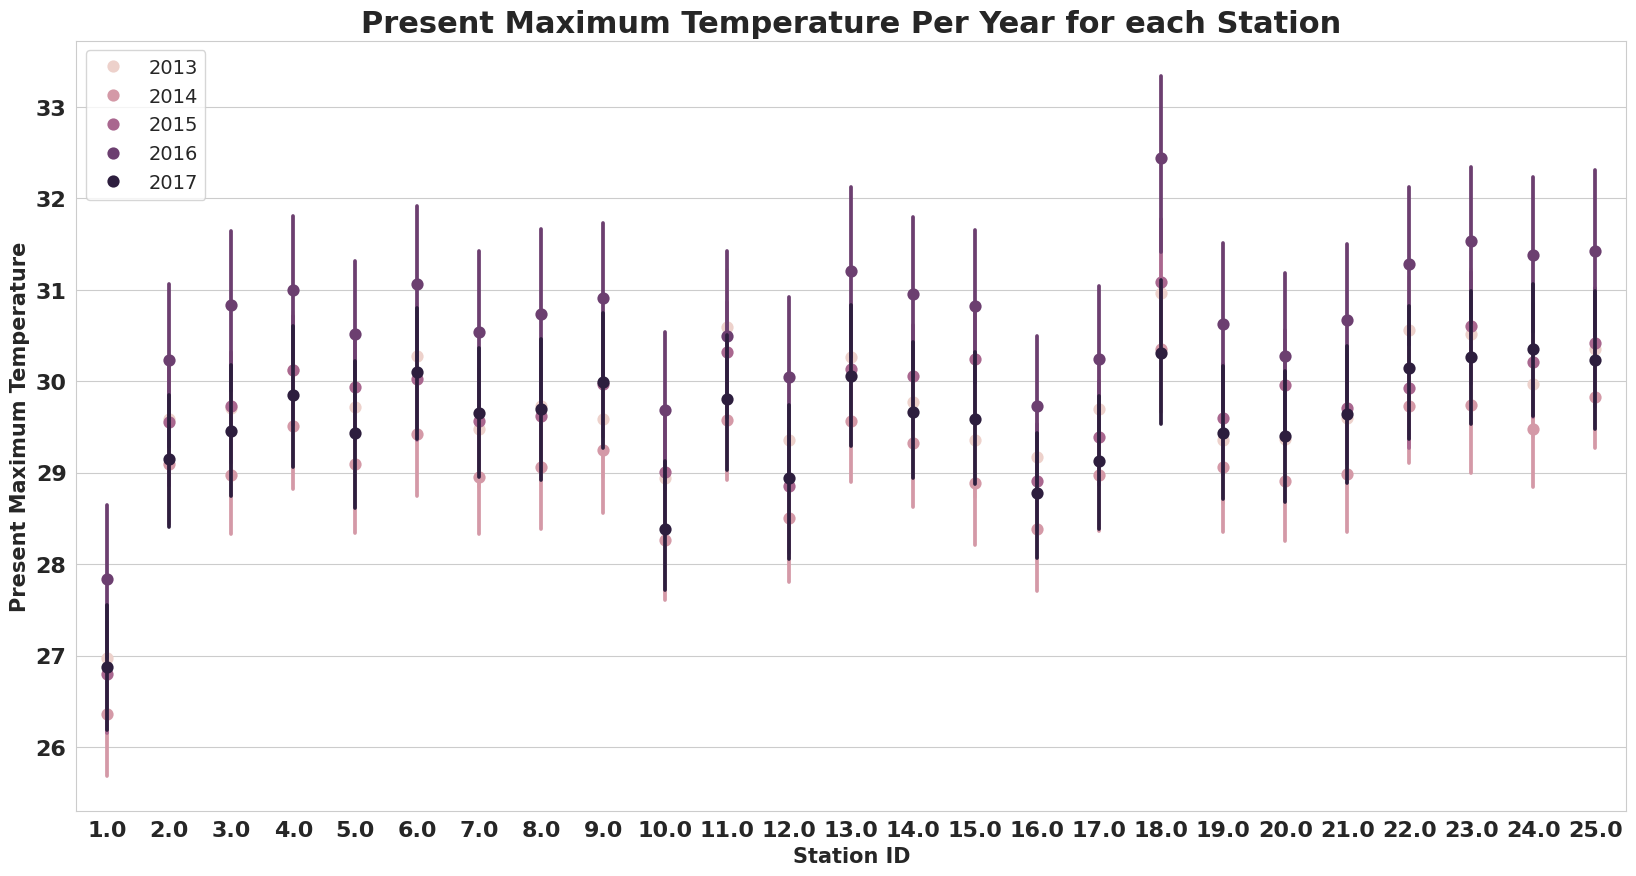

In [26]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

### Observation on line plot of Present Maximum Temperature:
- Over all four year higher temperature recorded at station 18 in compare to rest.
- Station 1 is coolest station over all timeframe.
-We can see 2016 is hottest year and 2014 is coolest year. It will be interesting to explore these two year independently.
- Year 2017 is much cooler compare to Year 2016. Precious relife to people in 2017 !!!

**Line Plot of Present Temperature Minimum over each Station**

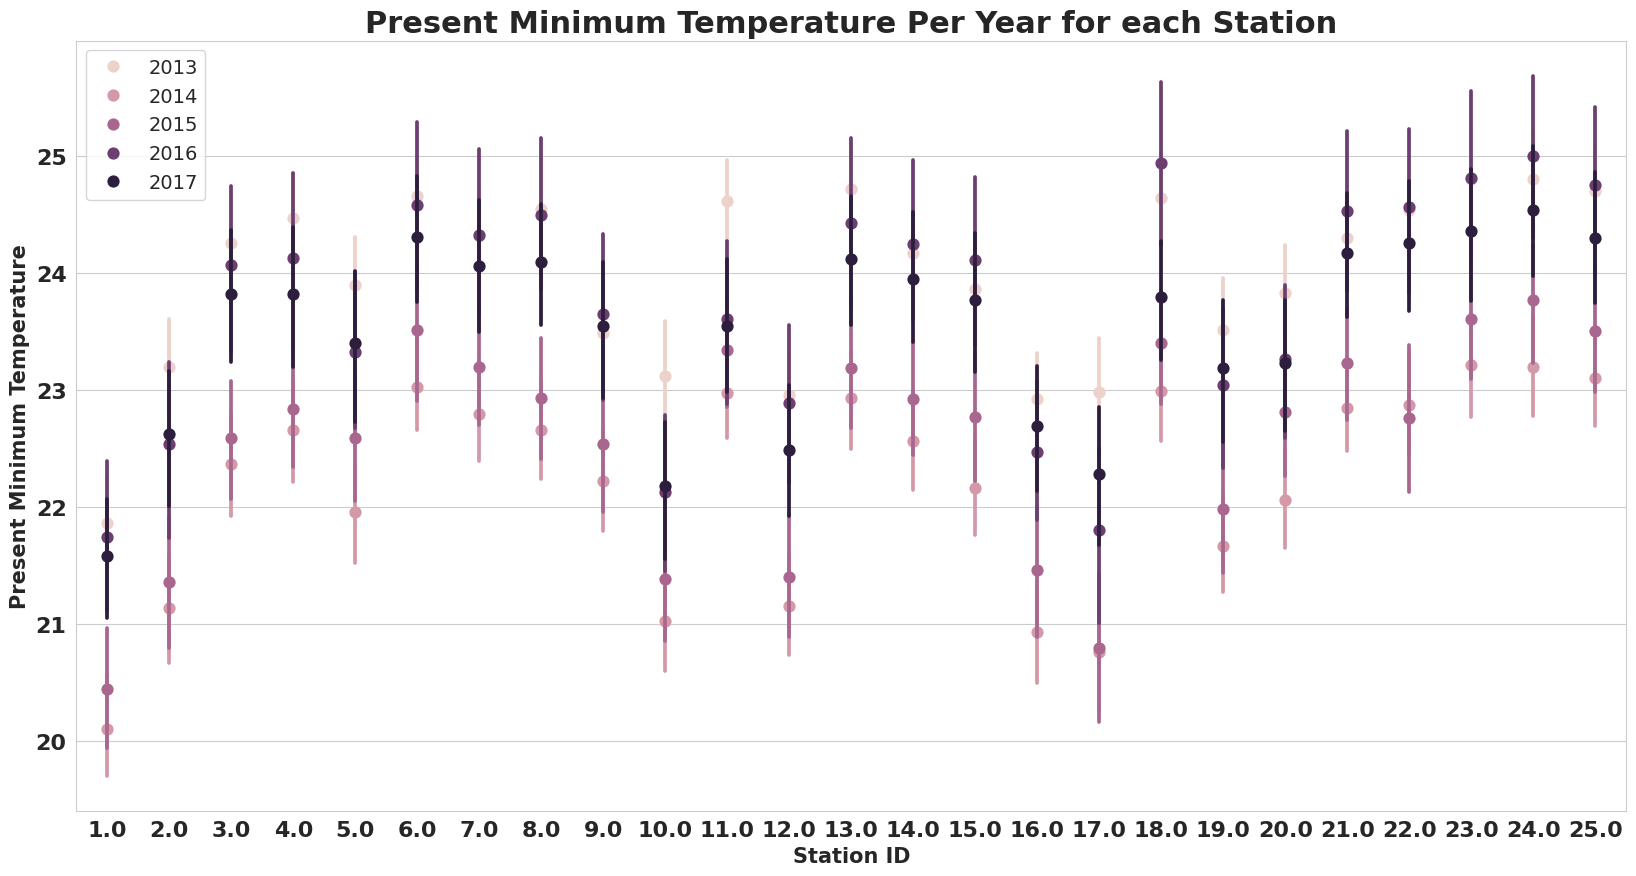

In [27]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

### Observation on line plot of Present Minimum Temperature:
- Year 2014 is coolest year of all time frame.
- Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. This is implies that over day period minimum temperature drop recorded at station 24.
- Station 1 is coolest station of all time followed by station 17. Must be tourist spot in Summer.

## Exploration of Target Variable

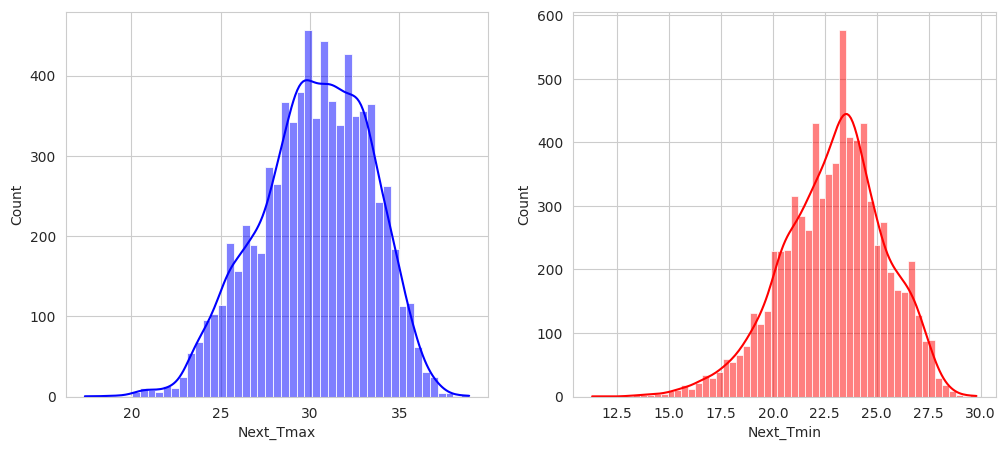

In [28]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

### Comment:
We get same result as we get in case of present temperature.

- For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

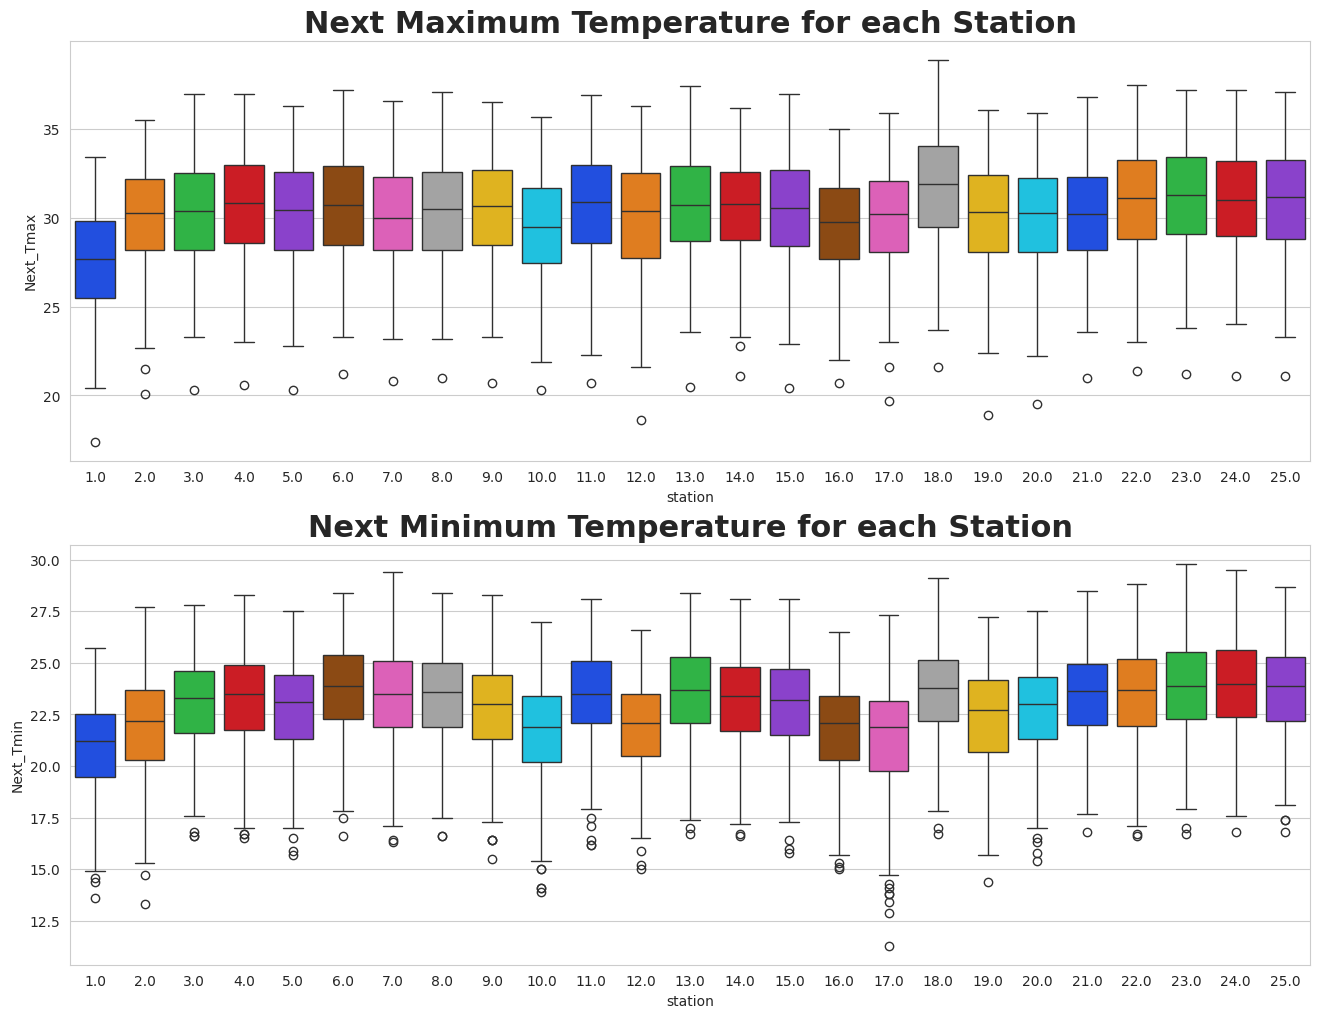

In [29]:
# Visualizing the realtion between station and target variables
# Setting the figure size
plt.figure(figsize=(16,12))

# Creating subplots
plt.subplot(2,1,1)  # First subplot for Next_Tmax
sns.boxplot(x=df['station'], y=df['Next_Tmax'], palette="bright")  # Boxplot for Next_Tmax
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')

plt.subplot(2,1,2)  # Second subplot for Next_Tmin
sns.boxplot(x=df['station'], y=df['Next_Tmin'], palette="bright")  # Boxplot for Next_Tmin
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')

plt.show()  # Display the plots


## Observation :
From the box plot

- we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.
- Maximum temperature difference at same station occur in station 17.

## Next Maximum Temperature Vs Cloud cover

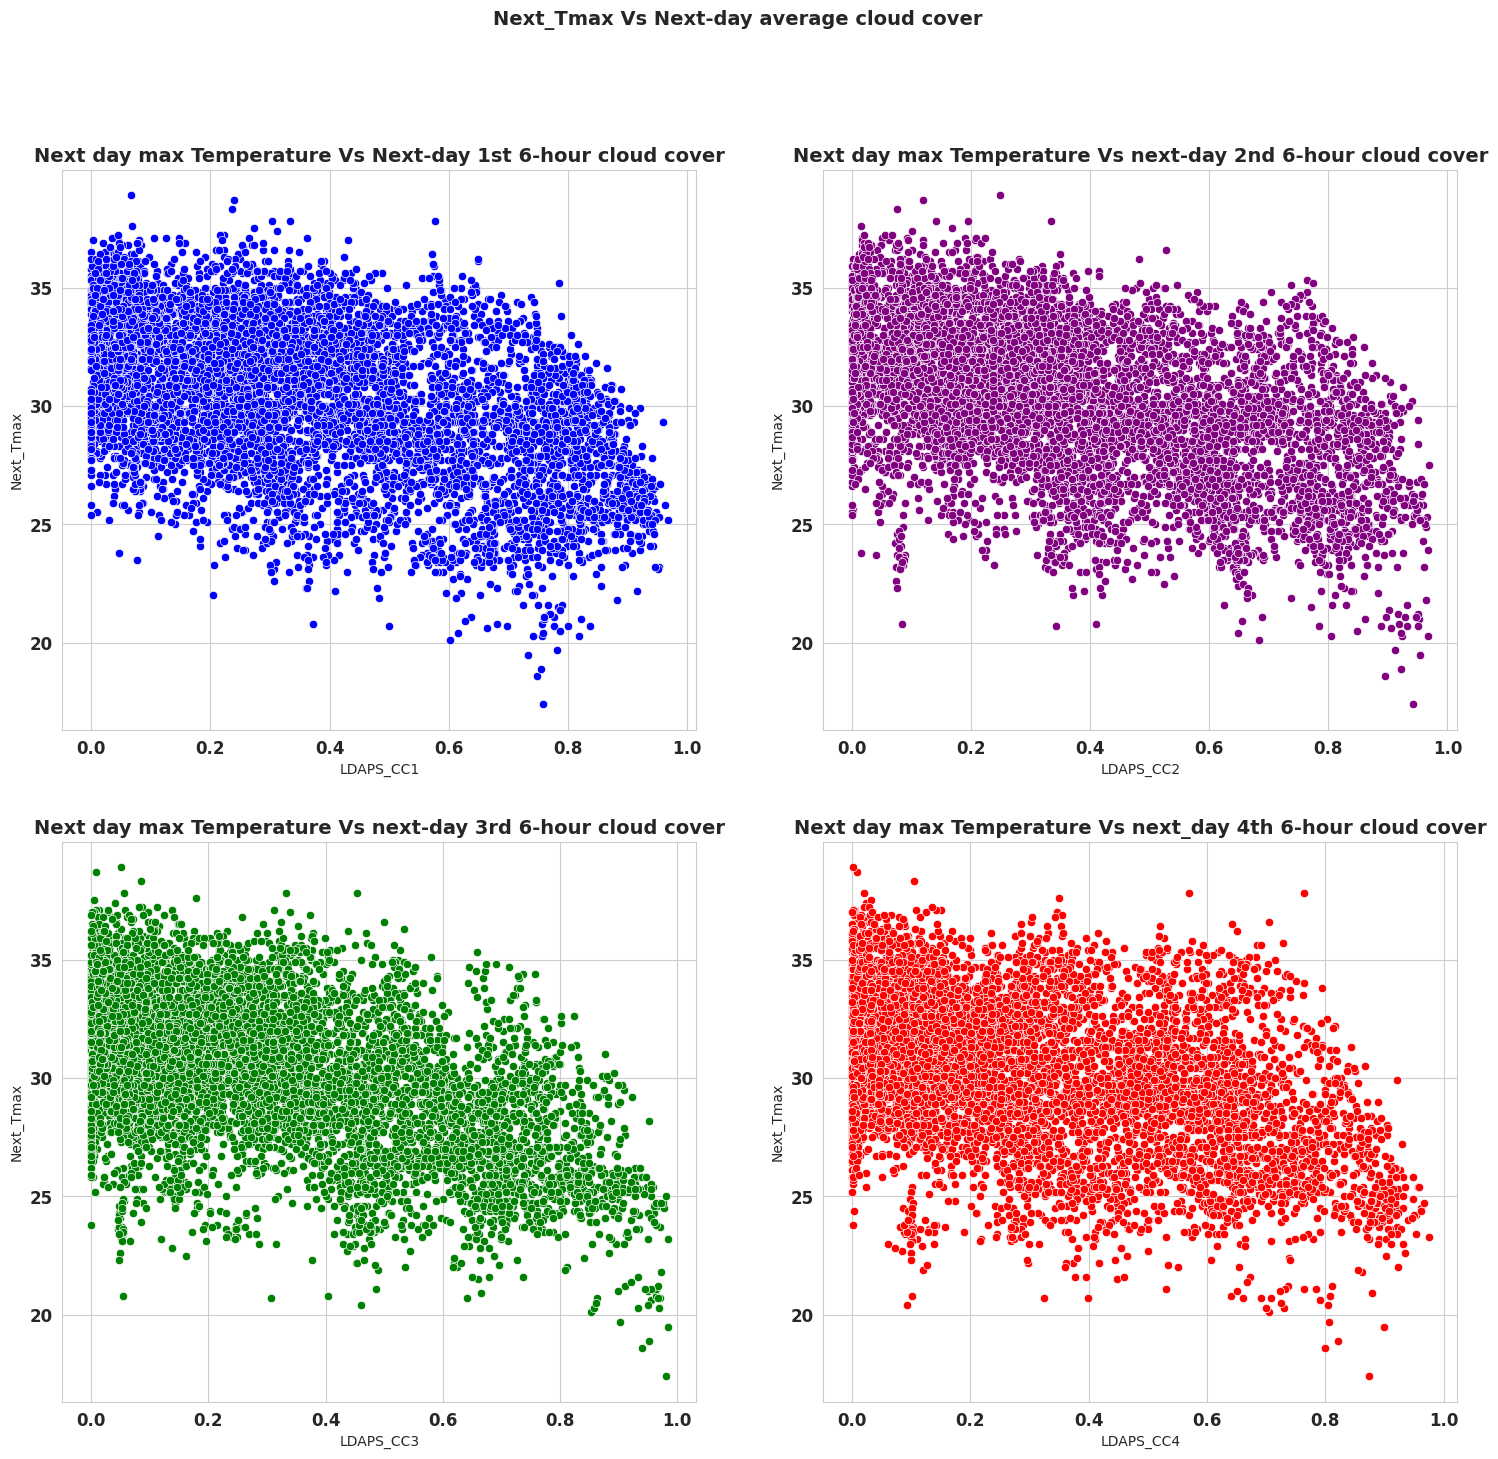

In [30]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

###Observation:
**Irrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6.**

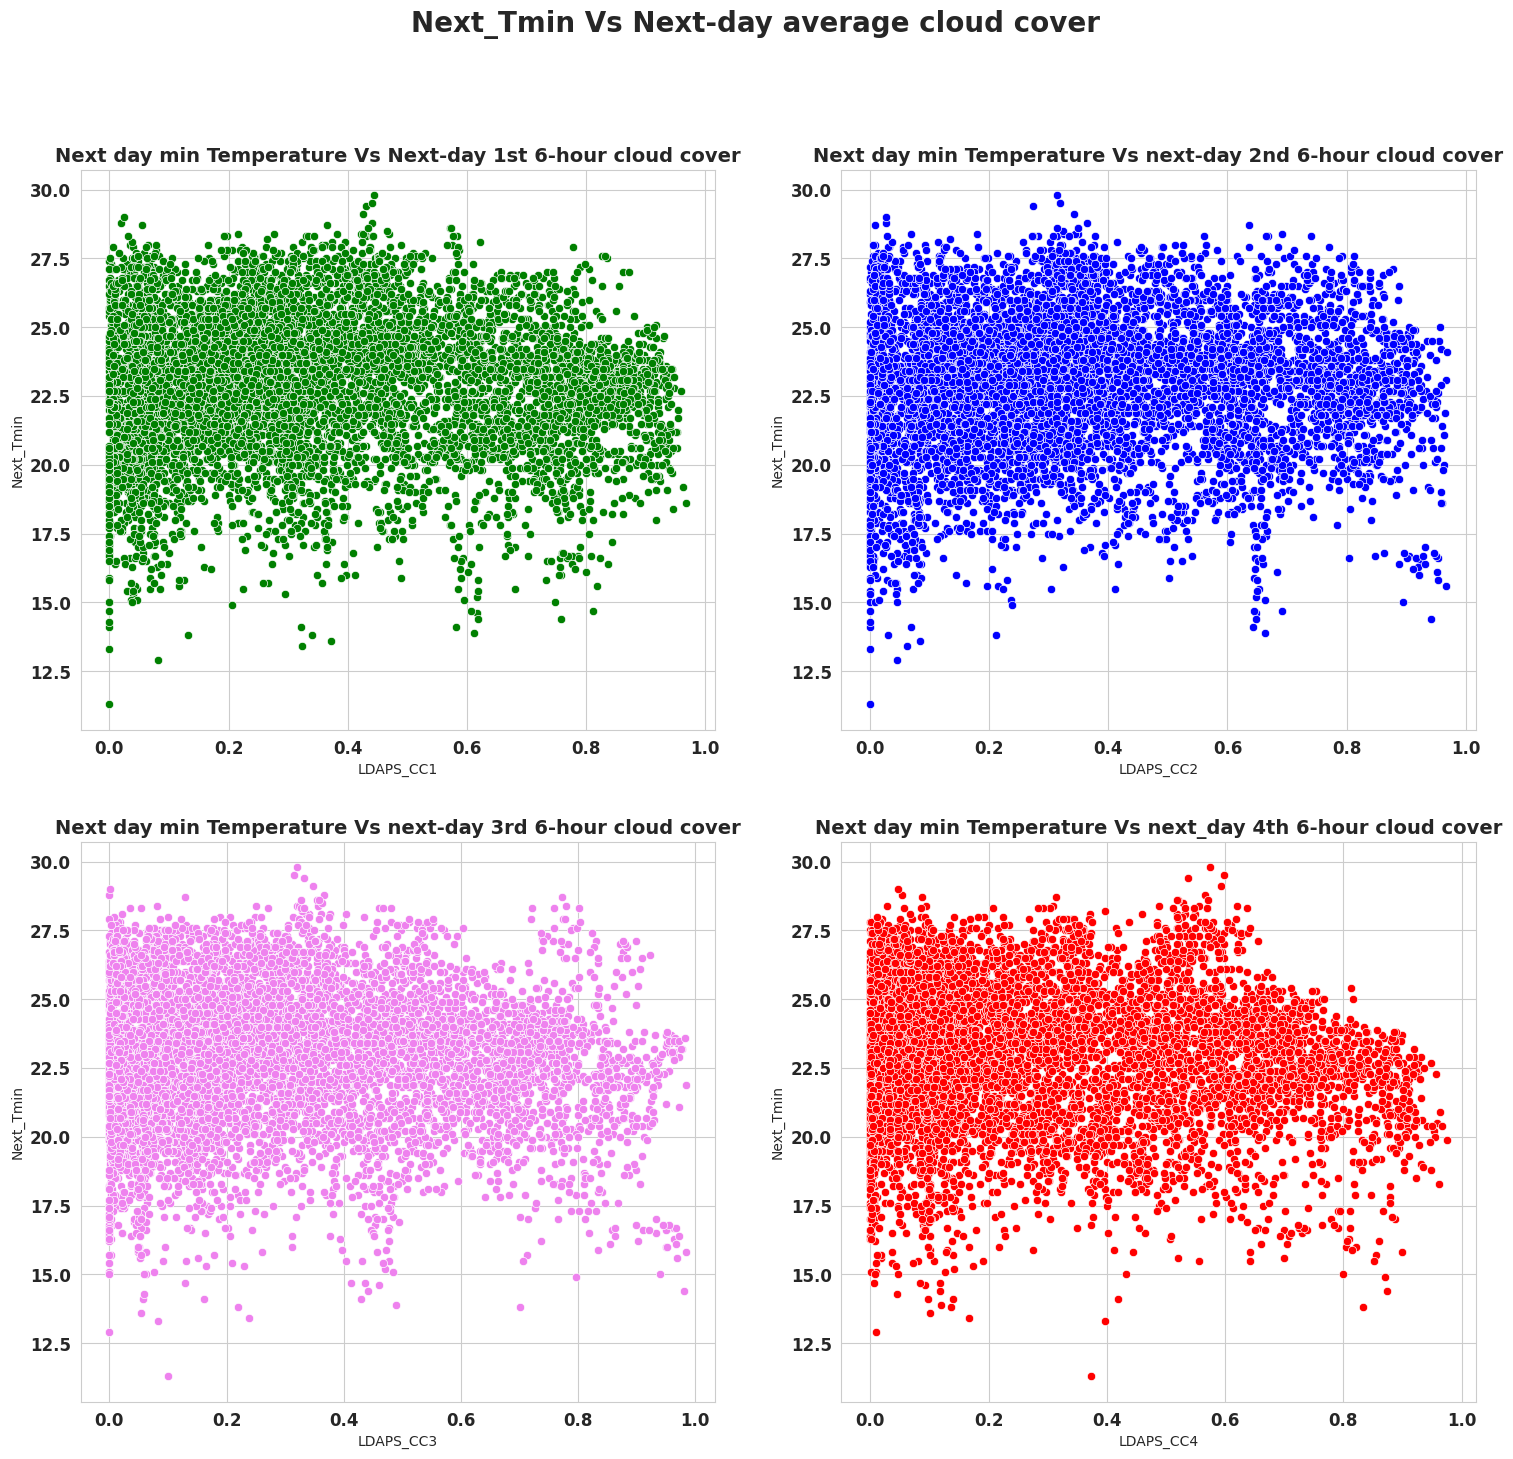

In [31]:
 # Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


**Observation:
No significant relation between Next_Tmin and cloud cover in scatterplot.**

##Solar radiation might most impact on Cloud cover and precipitation, its time to explore them.

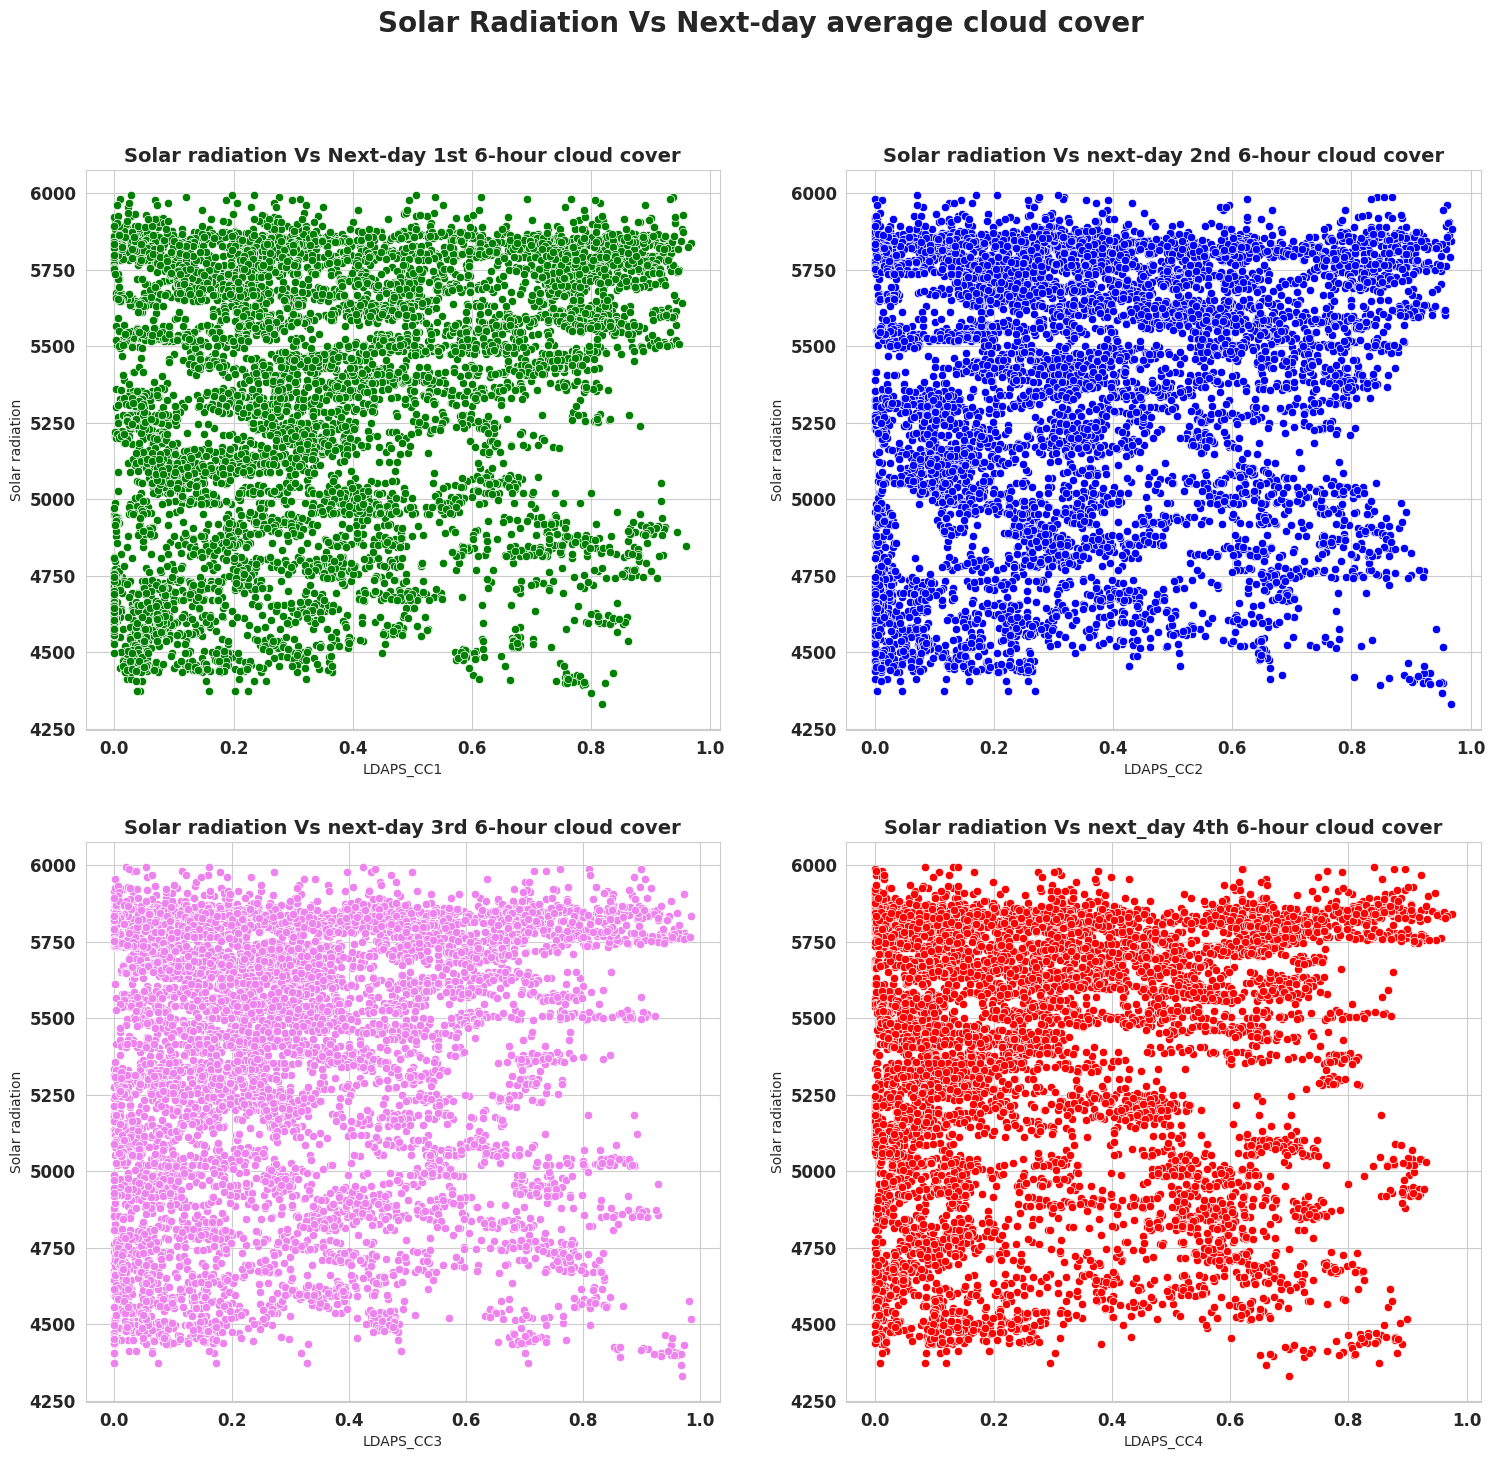

In [32]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

**Observation:
We can definitely say that for cloud cover greater than 0.7 high value solar radiation contributed most.**

###Precipitation VS Solar radiation

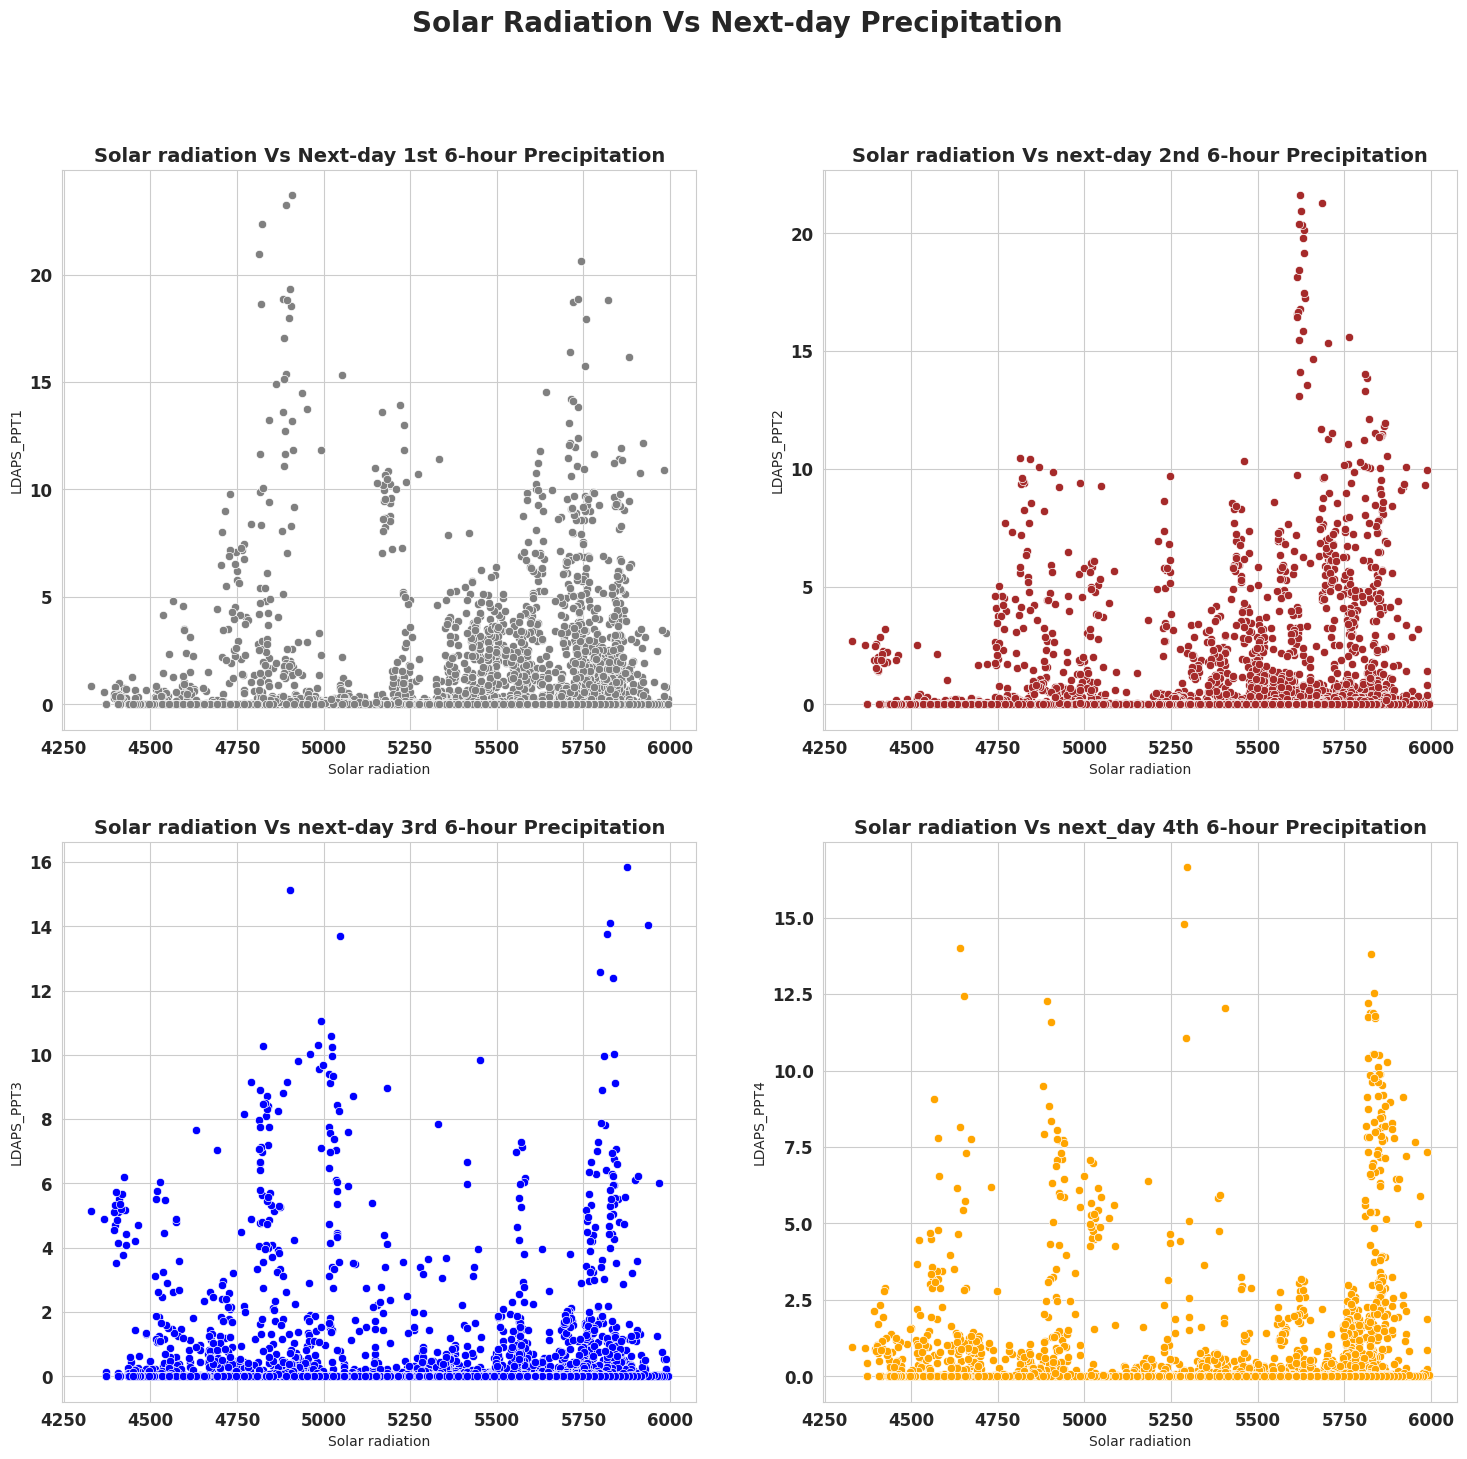

In [33]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Observation:
- Irrespective of to which 6 hr quarter reading belong, solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).
- if we consider scatterplot of solar radiation vs cloud cover along with above scatter plot, we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud cover.

**This all give rise to few questions here**

1.Where relative humidity and wind speed fit in this equation of precipitation?

2.Latent heat means heat absorption at constant temperature, there has to some effect of latent heat flux variation on relative humidity.

3.Another interesting thing to look forward is wind tend to blow clound. What is wind speed value in relative terms when cloud cover is high?

4.What is variation in precipitation,cloud cover and wind speed over year period?

5.Variation of temperature over duration of one year period?

**Lets start investigation from last question.**

<Axes: xlabel='Month', ylabel='LDAPS_PPT1'>

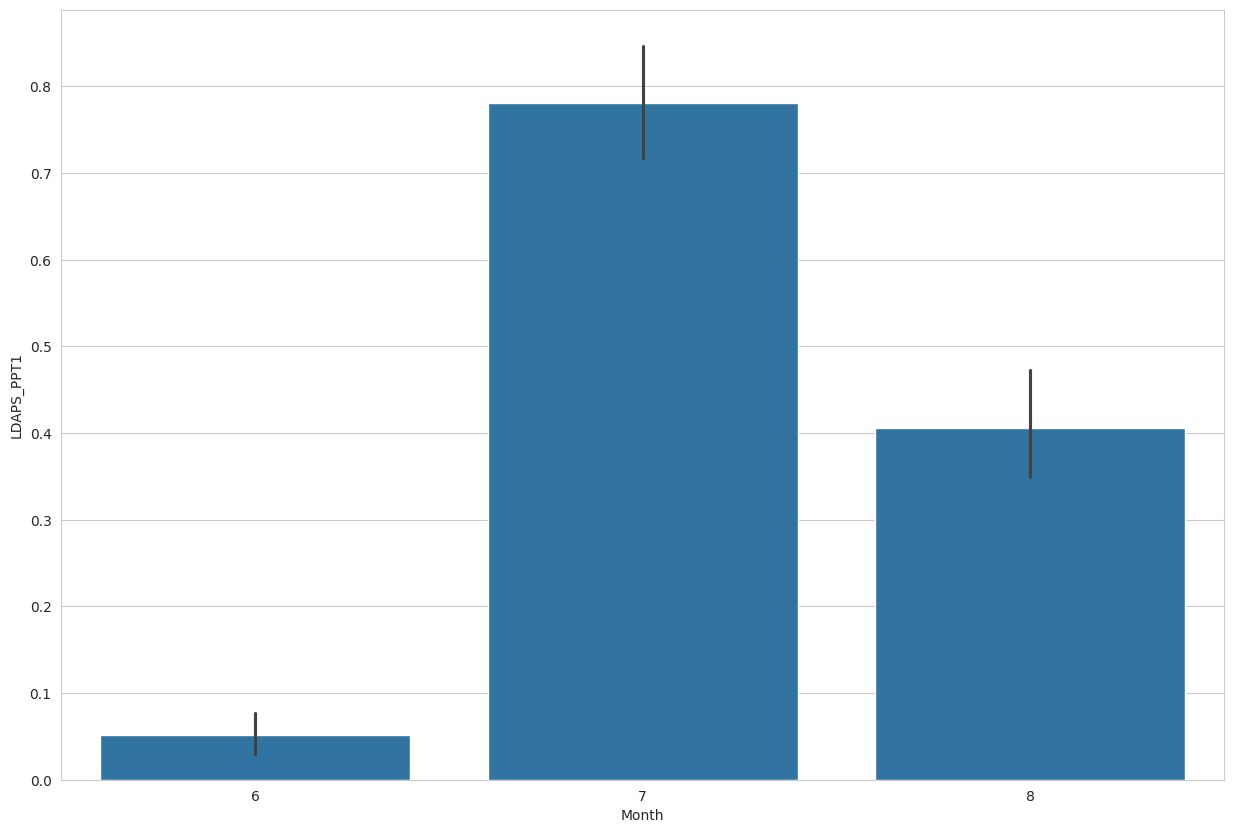

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'])

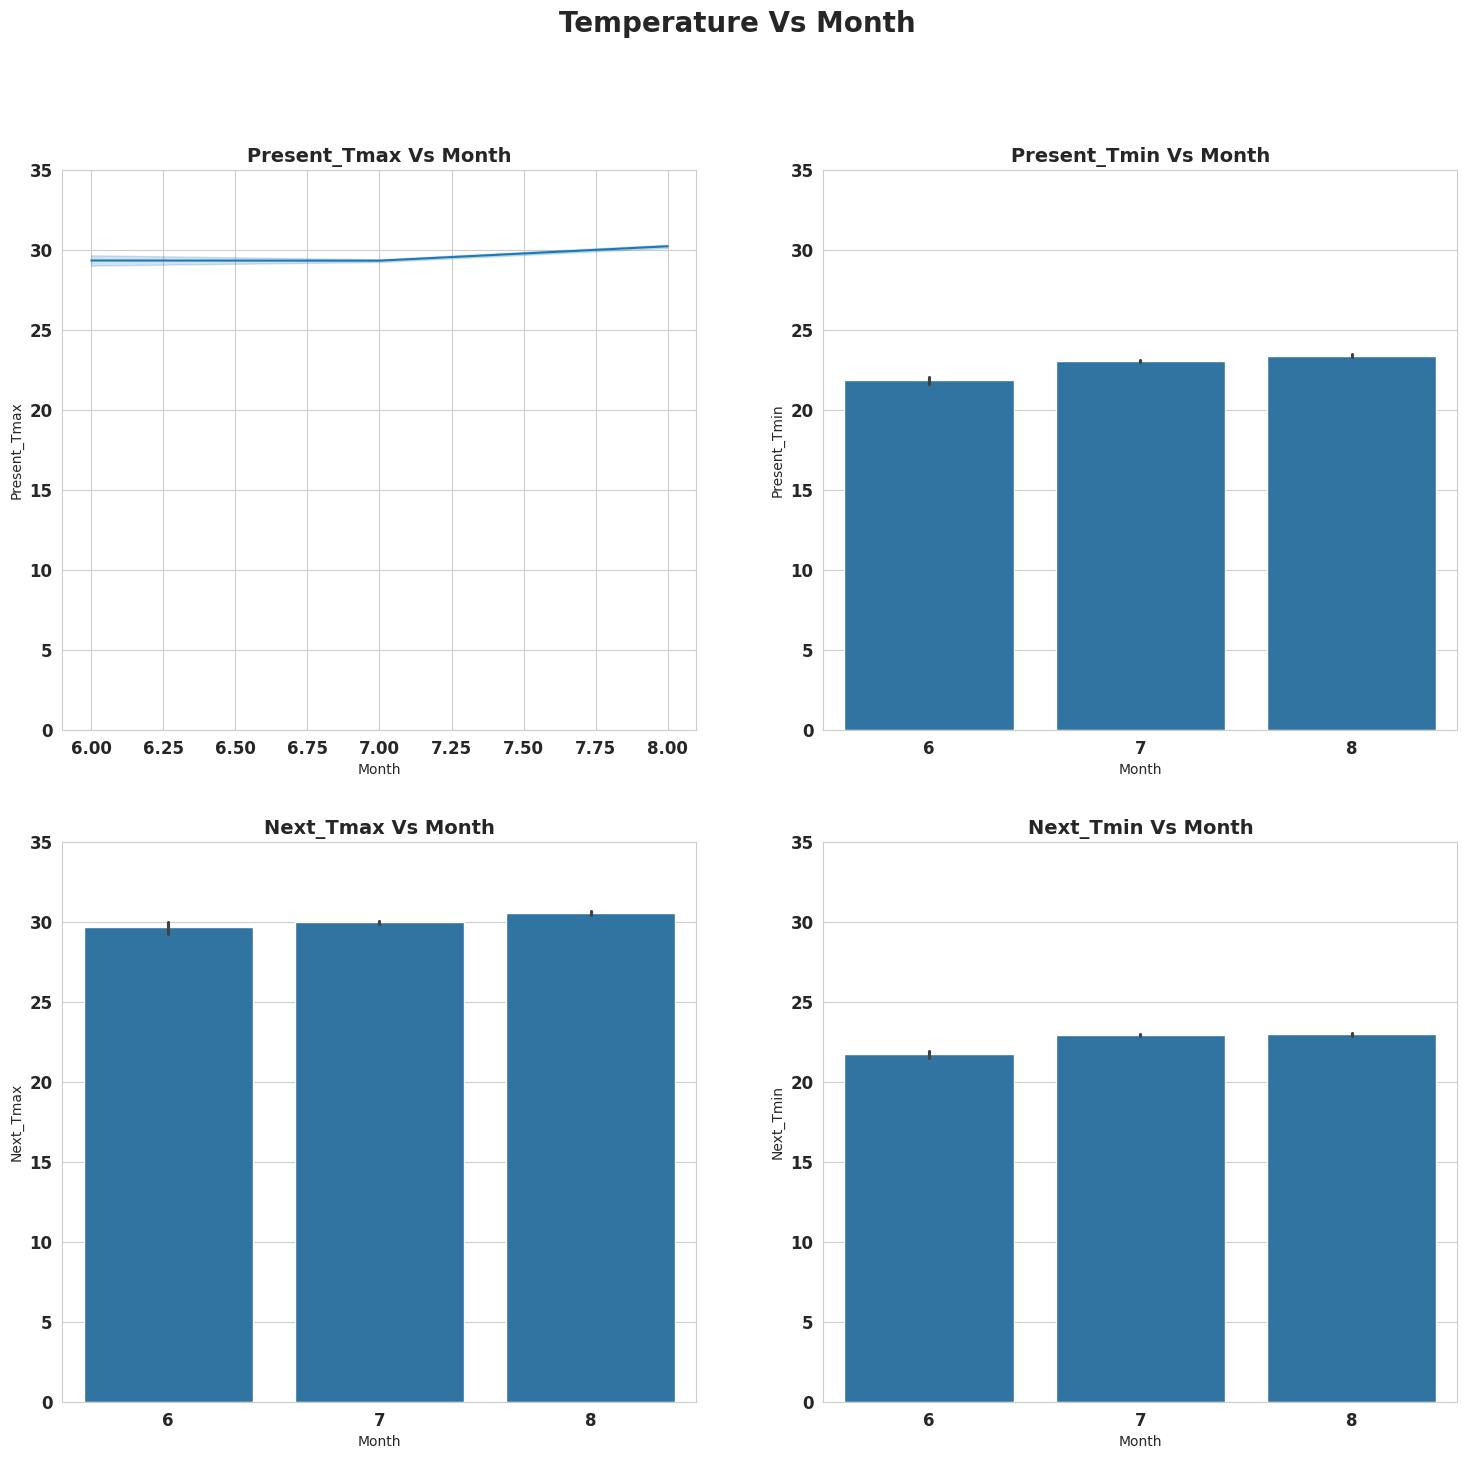

In [35]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

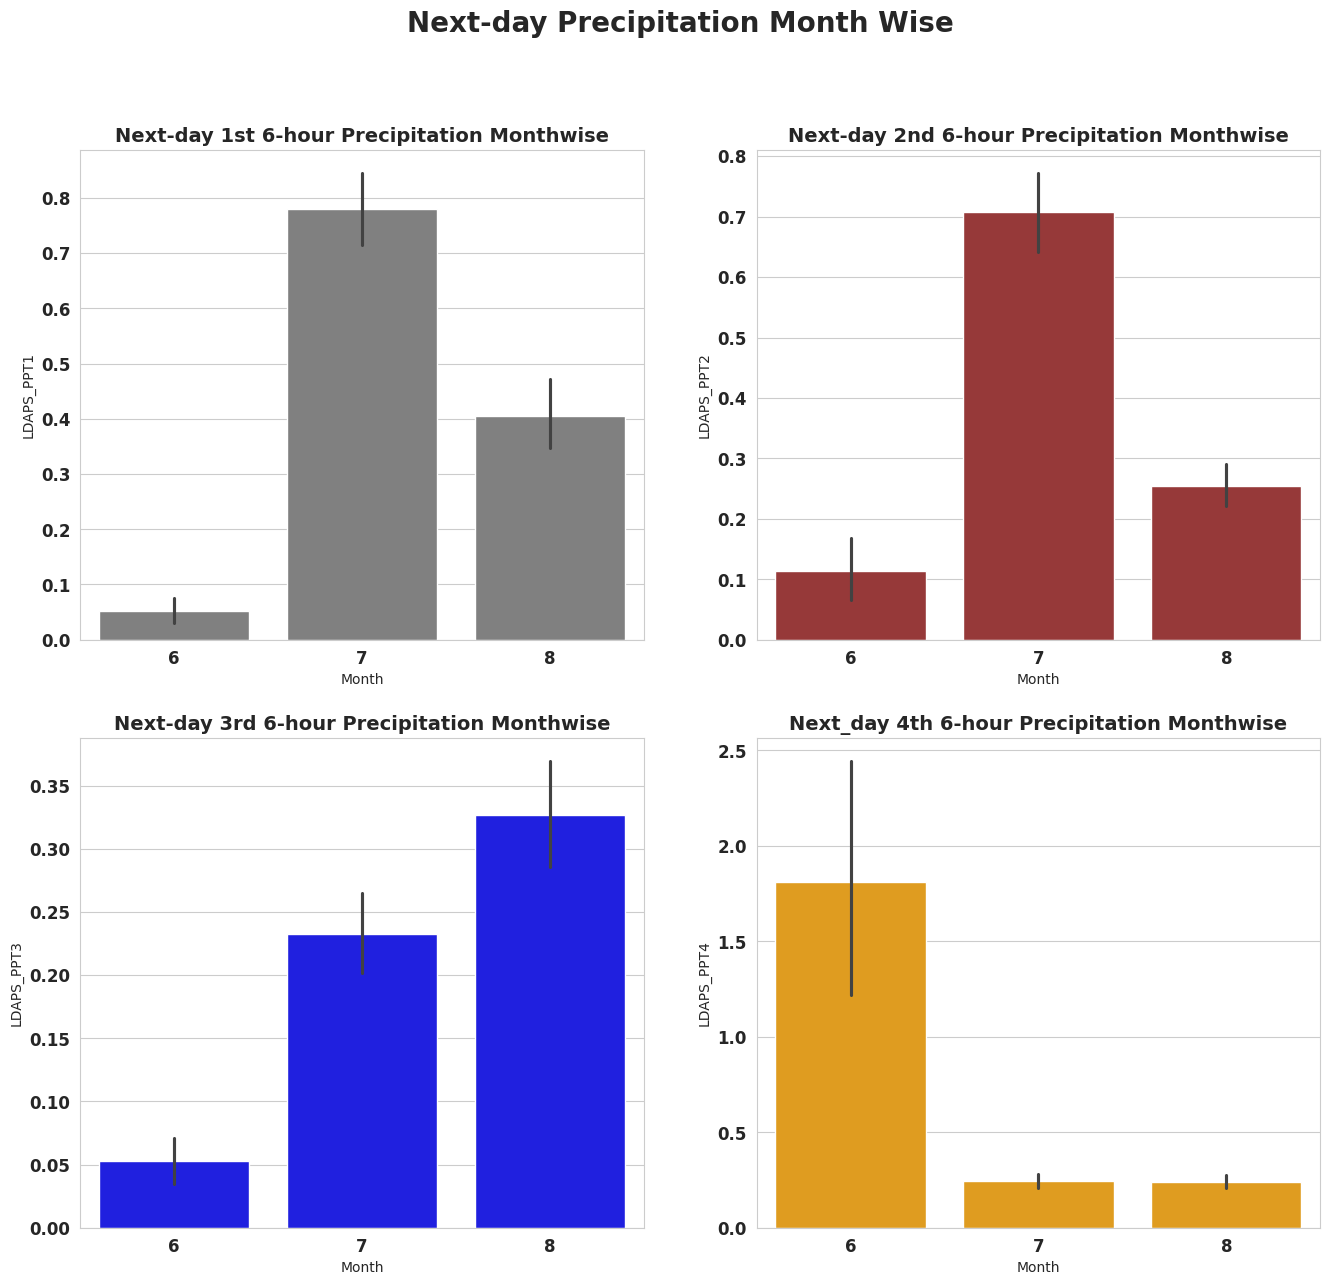

In [36]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.724207856747


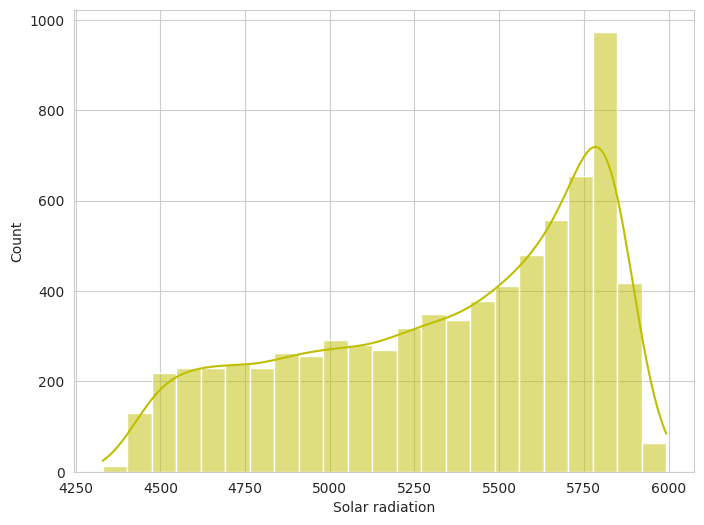

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

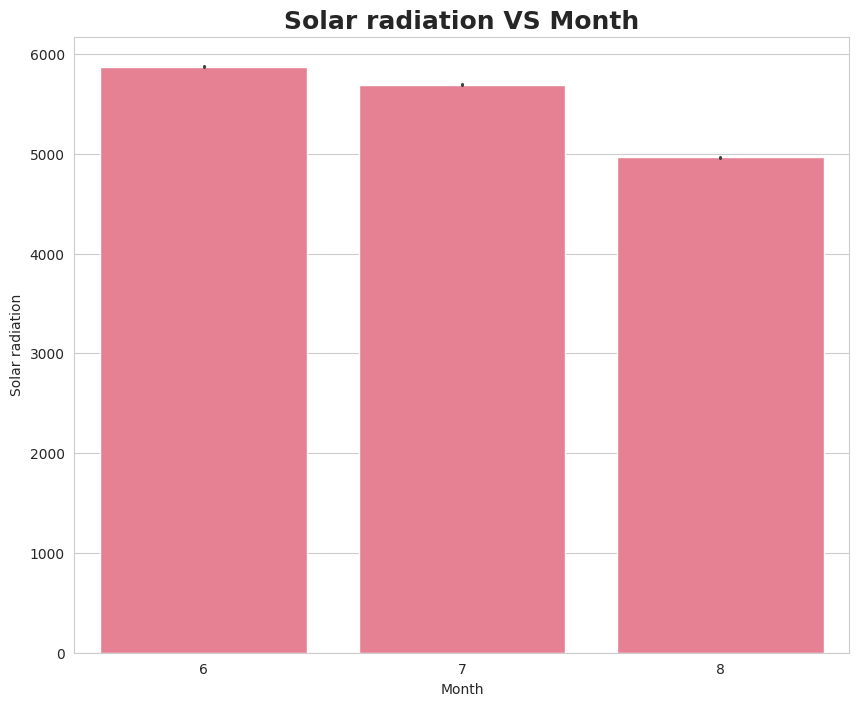

In [38]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


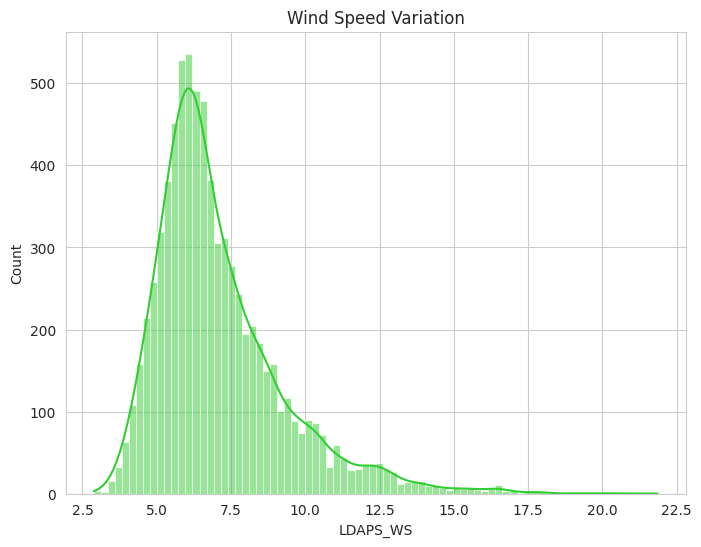

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

## Comment :
- It have its minimum value at 2.88m/s and maximum values at 21.85m/s
- For most of reading values lies in the rabge 5m/s to 8m/s
- Graph is slightly right skewed.

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


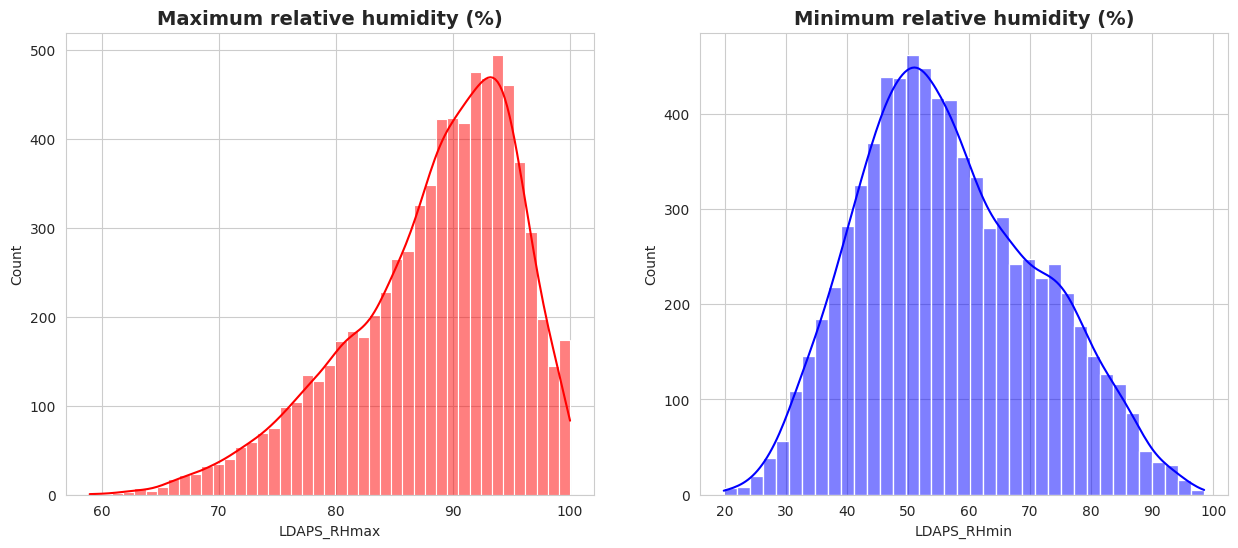

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

### Comment :
- Data of Maximum Relative humidity is left skewed and Data of Minimum Relative humidity is slightly right skewed.
- Maximum Relative humidity for most of the days lie in the range 90 to 97
- Maximum Relative humidity lies in the range 45 to 62.

Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


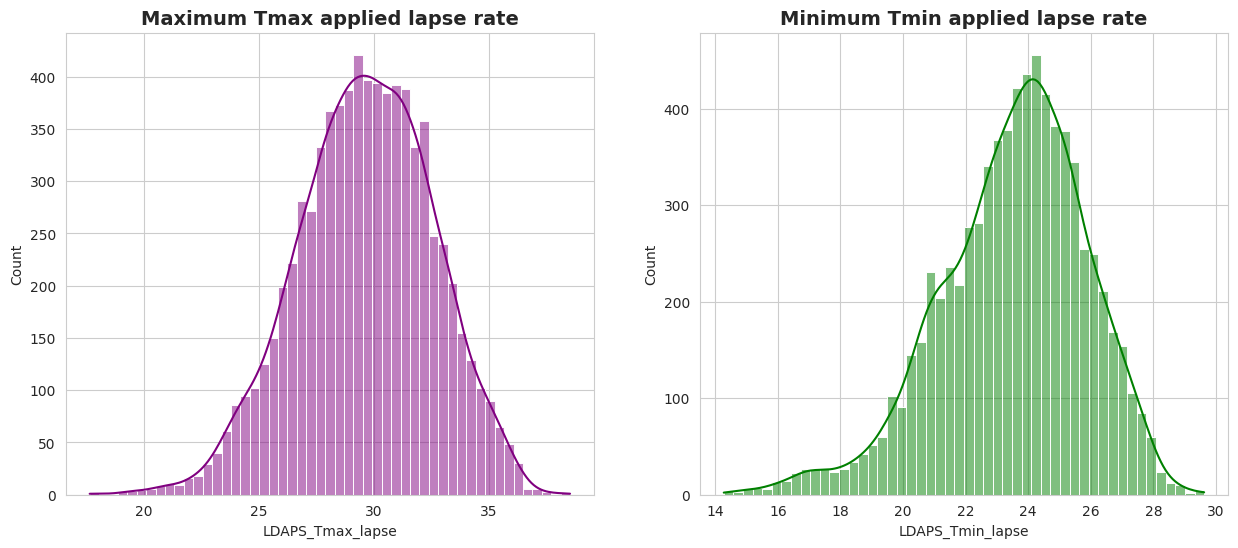

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

## Observation :
- Tmax and Tmin for applied lapse rate are almost normally distributed.
- Tmax_lapse for majority of days its values lies in the range 27 to 33 (Â°C).
- Tmin_lapse for majority of days its values lies in the range 23 to 26 (Â°C).

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


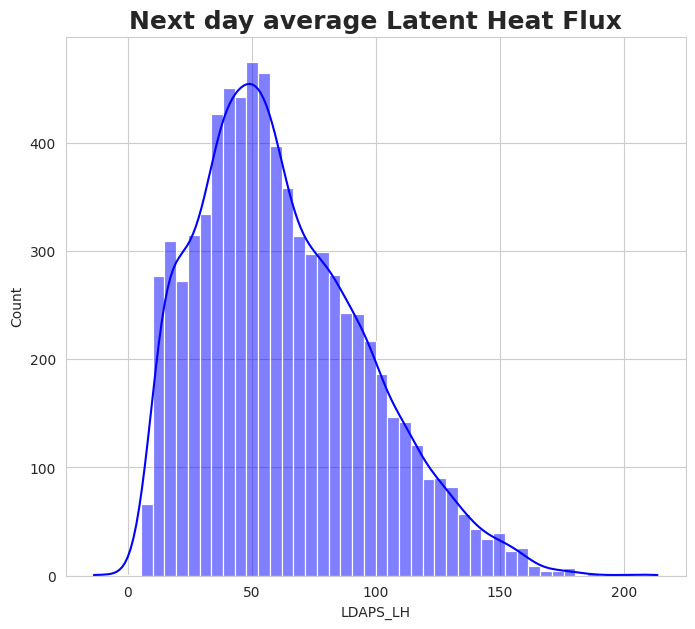

In [42]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

# Encoding categorical data

In [43]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], object: ['State', 'City']}

In [44]:
# Using Label Encoder on categorical variable
Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [45]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

# Feature selection and Engineering

# 1. Outliers Detection and Removal

In [46]:
df.shape

(7588, 29)

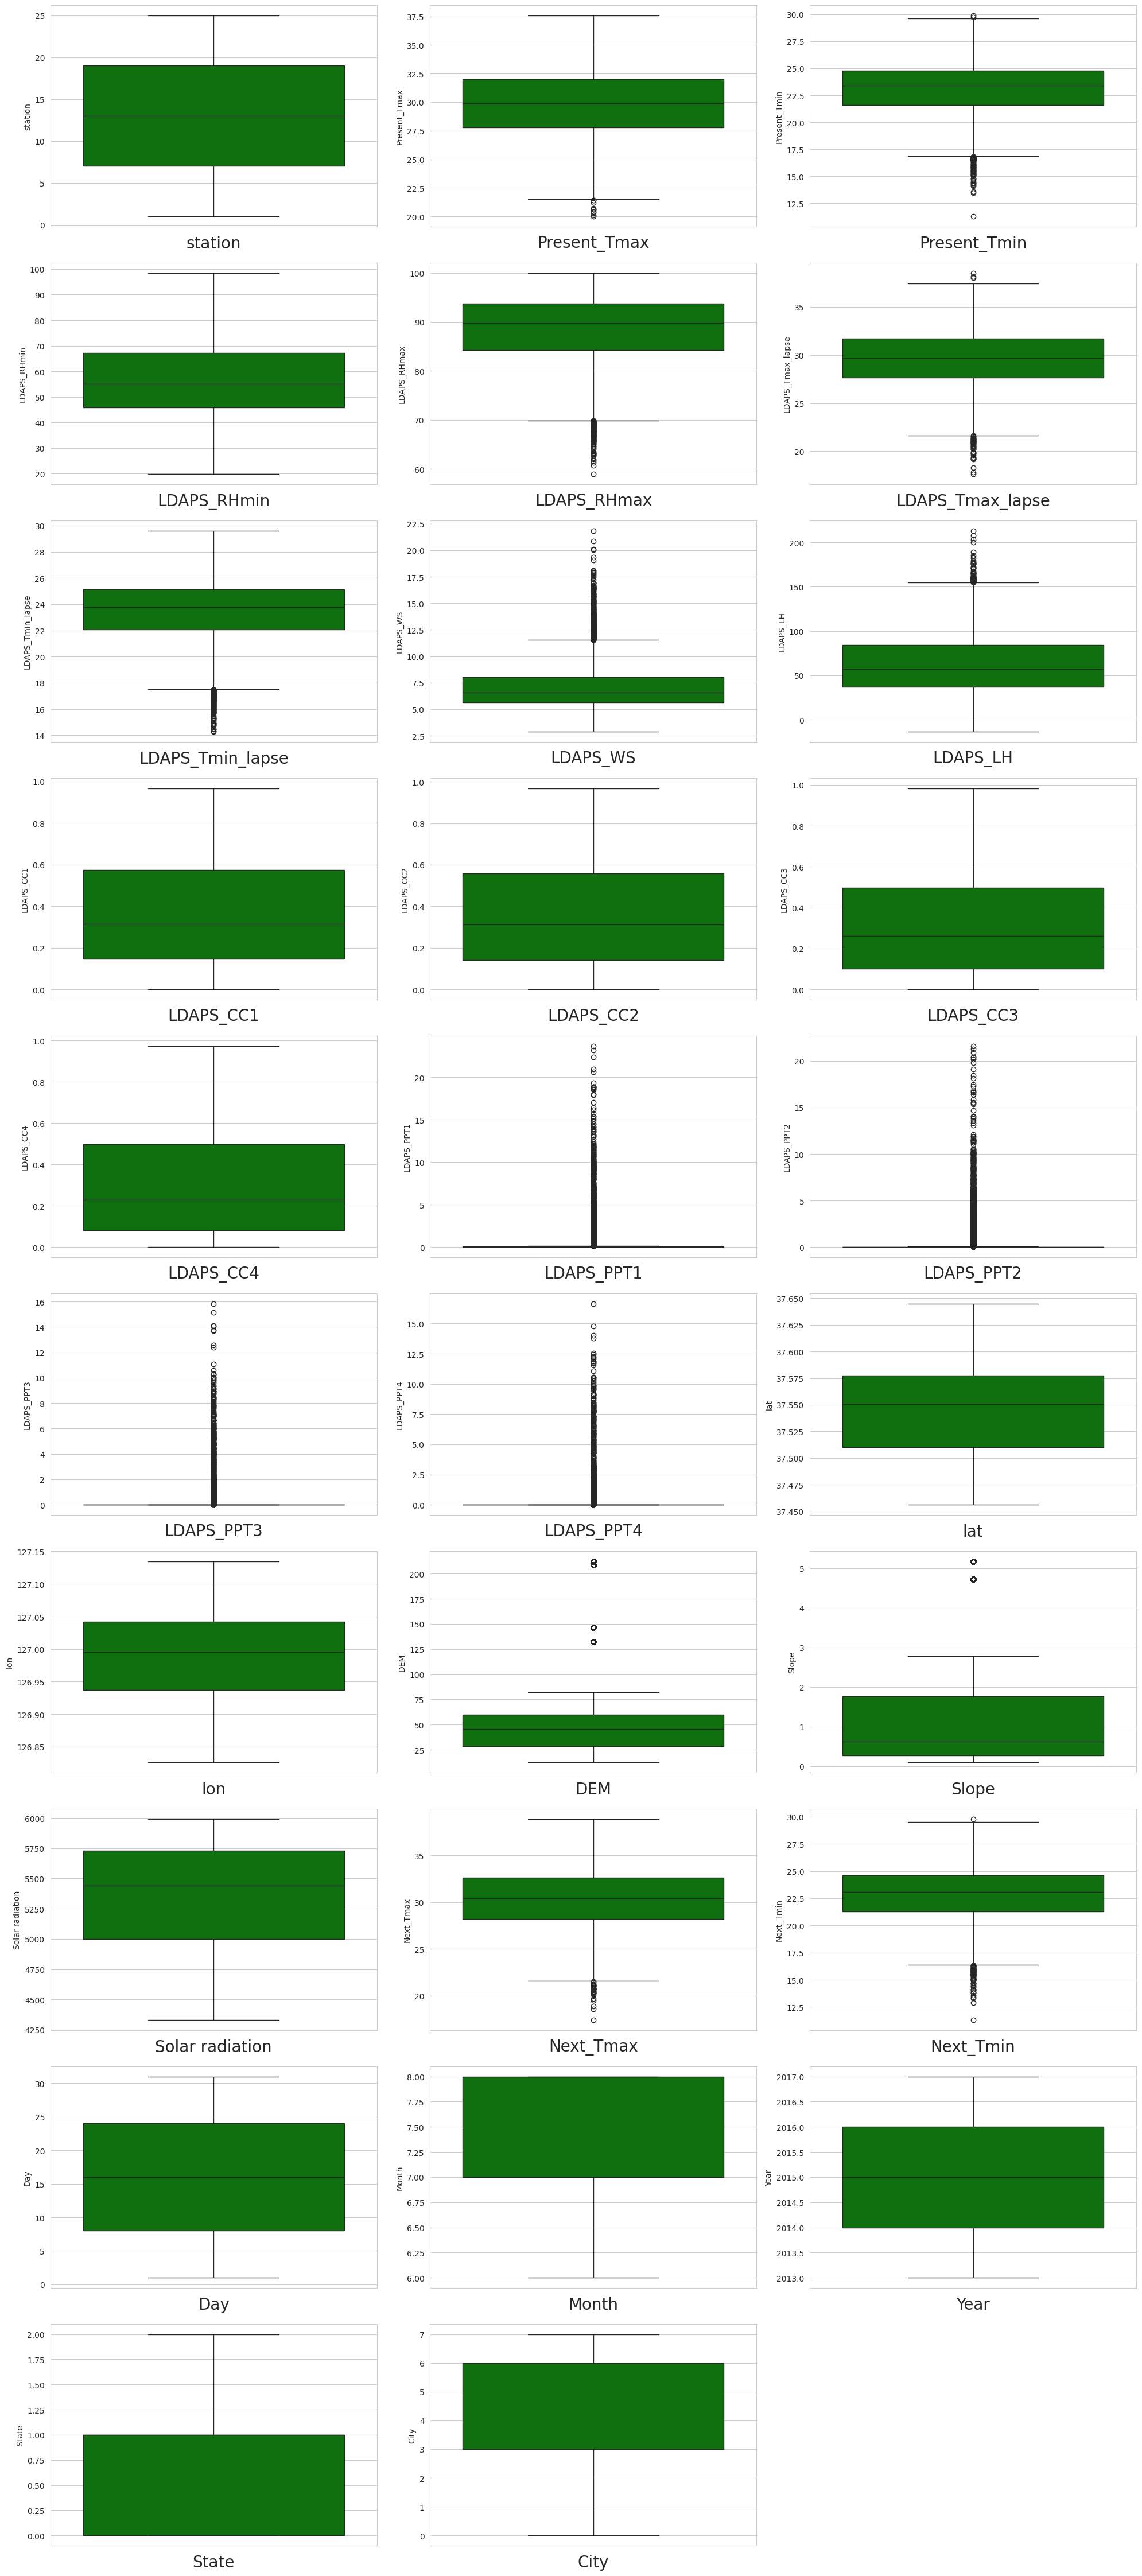

In [47]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

**From Boxplot we can see outliers exist dataset**

# Outliers removal using Zscore method

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


**We are losing 11.18 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building**

# 2. Skewness of features

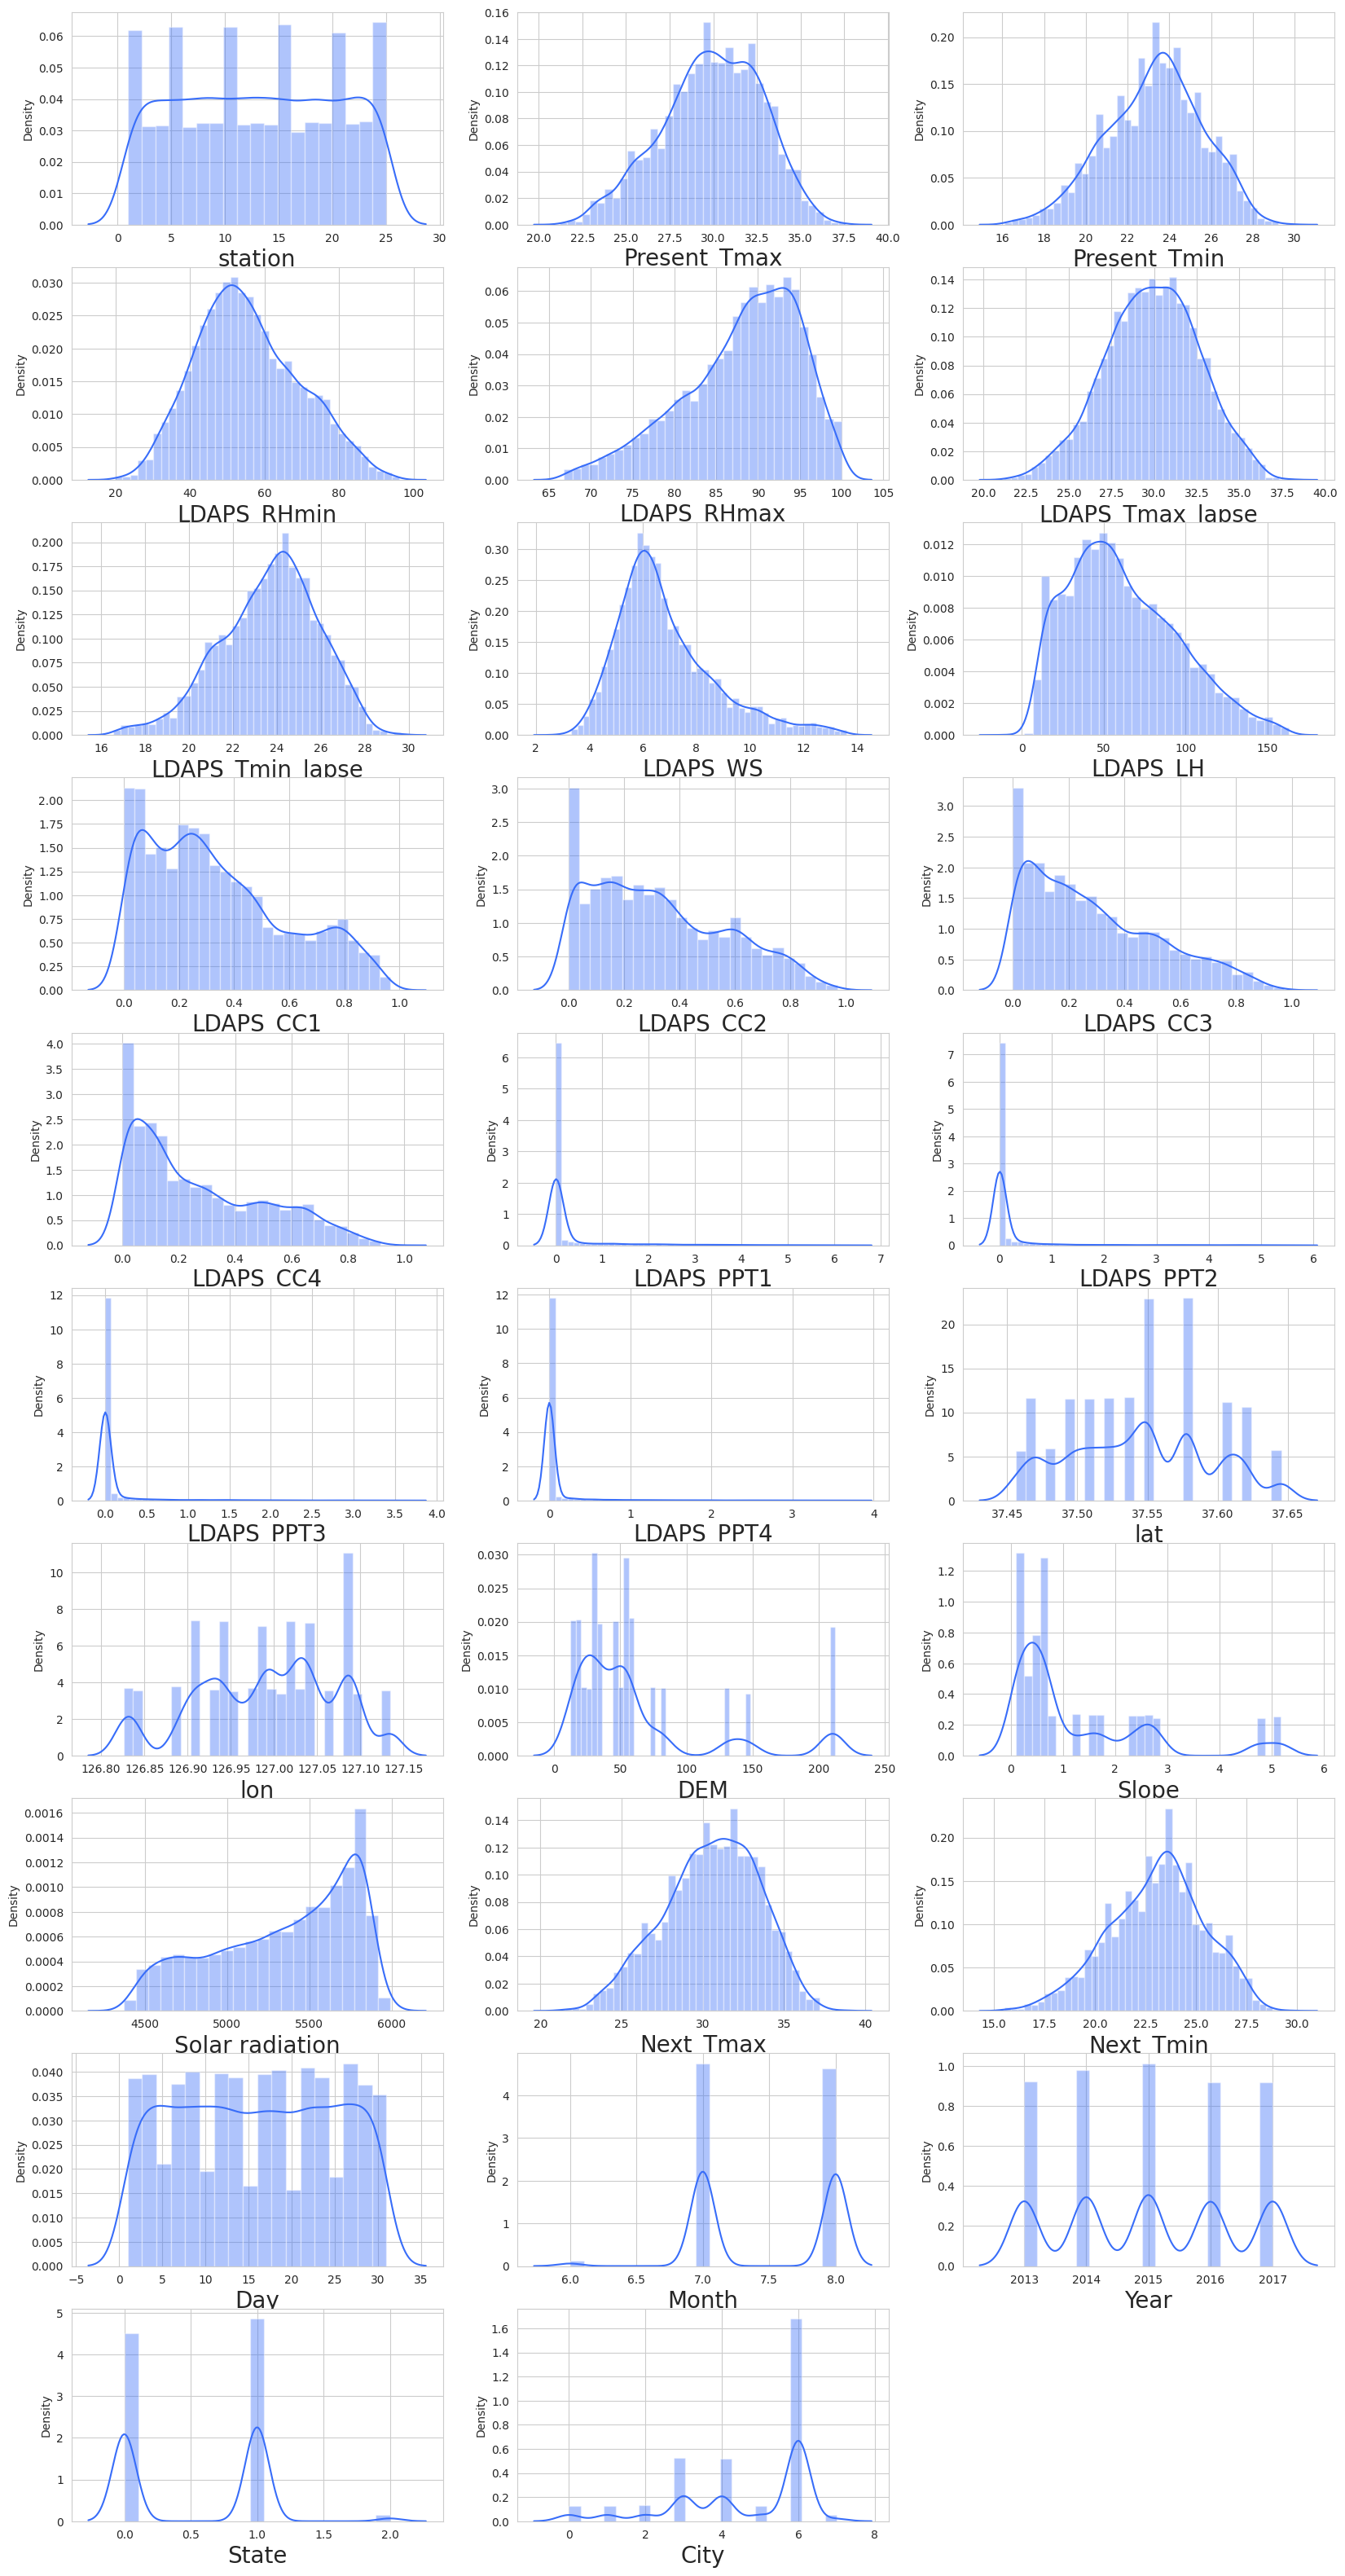

In [49]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

**We also going to ignore sknewness in target feature.**

In [50]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.168571
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

**Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.**

In [51]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

### For LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed but it got reduced

# 3. Corrleation

In [52]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005032     -0.130708     -0.082712    -0.073118   
Month             0.011309      0.171614      0.104576    -0.183976   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

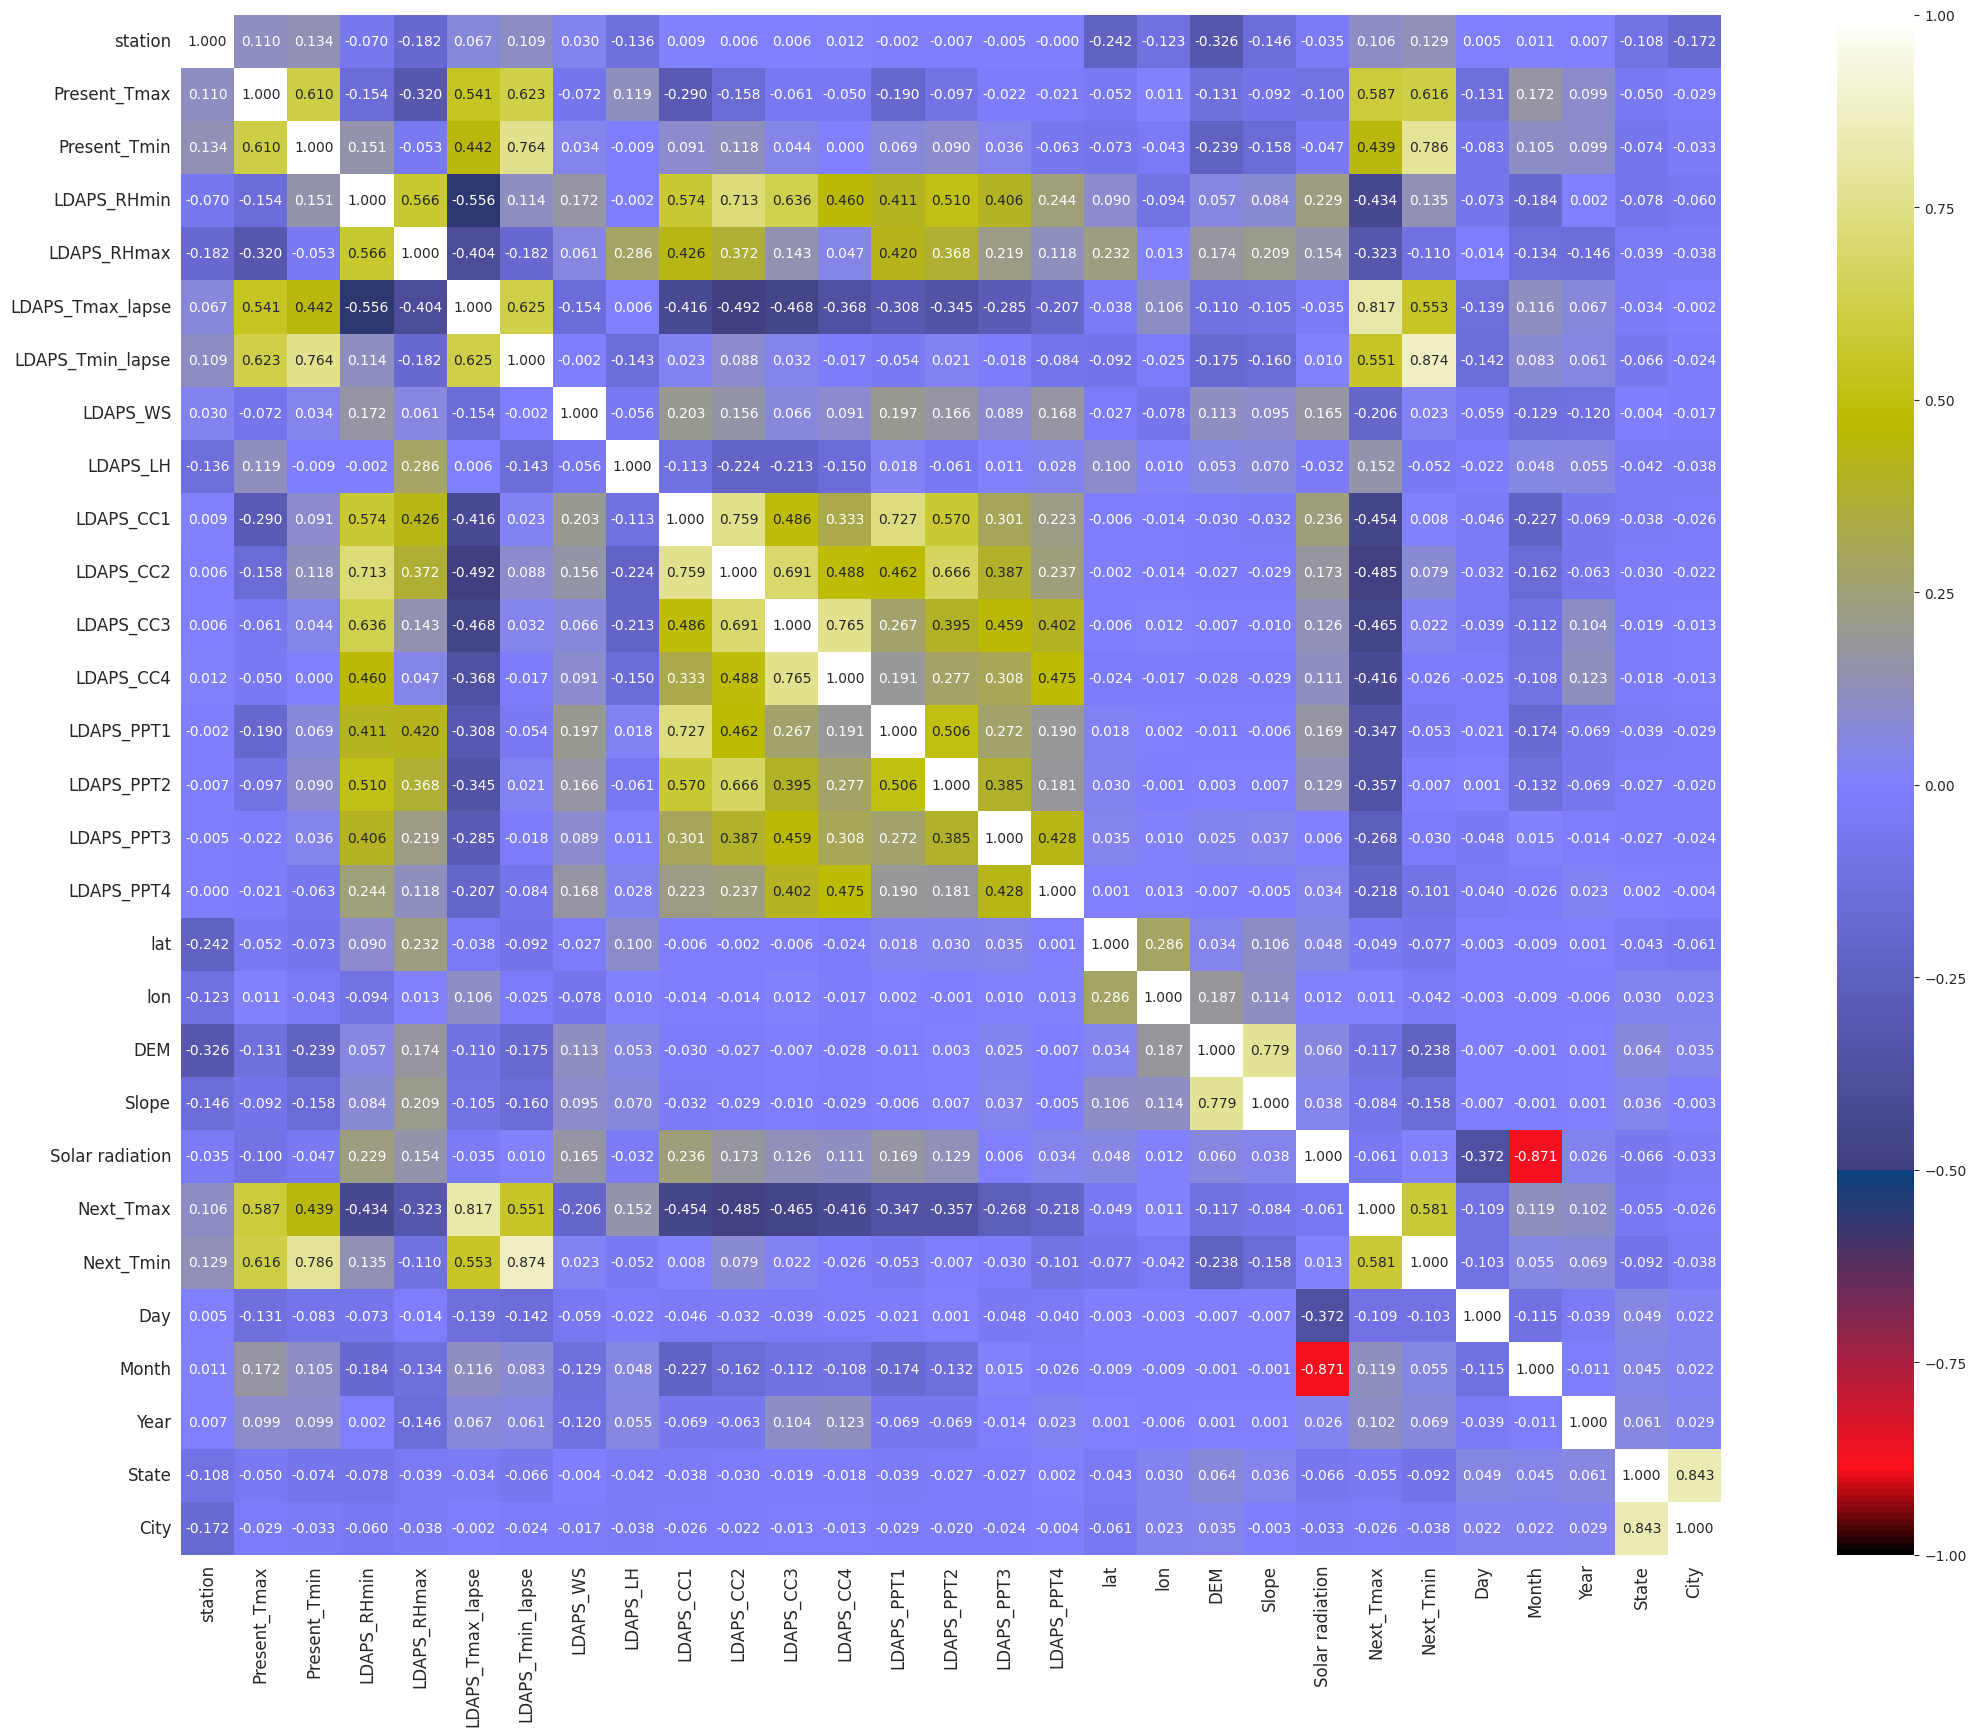

In [53]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

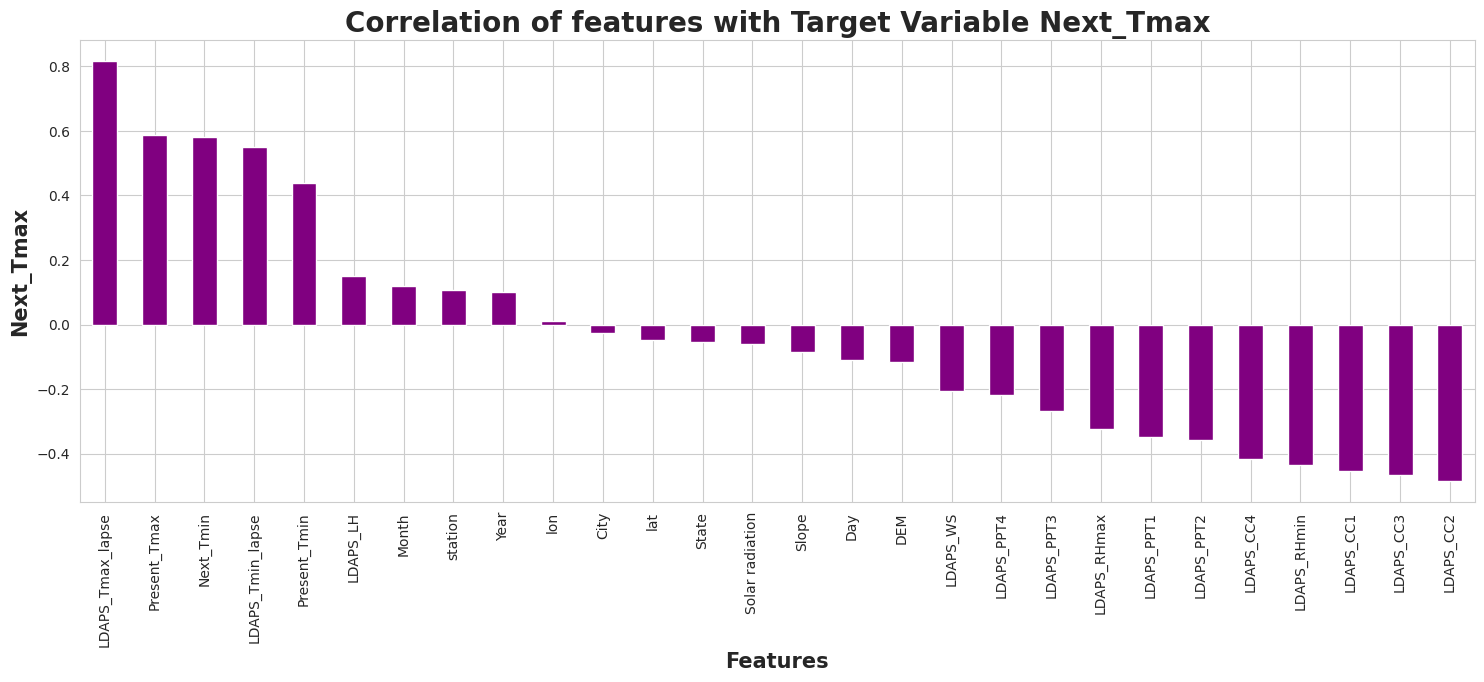

In [54]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

**Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.**

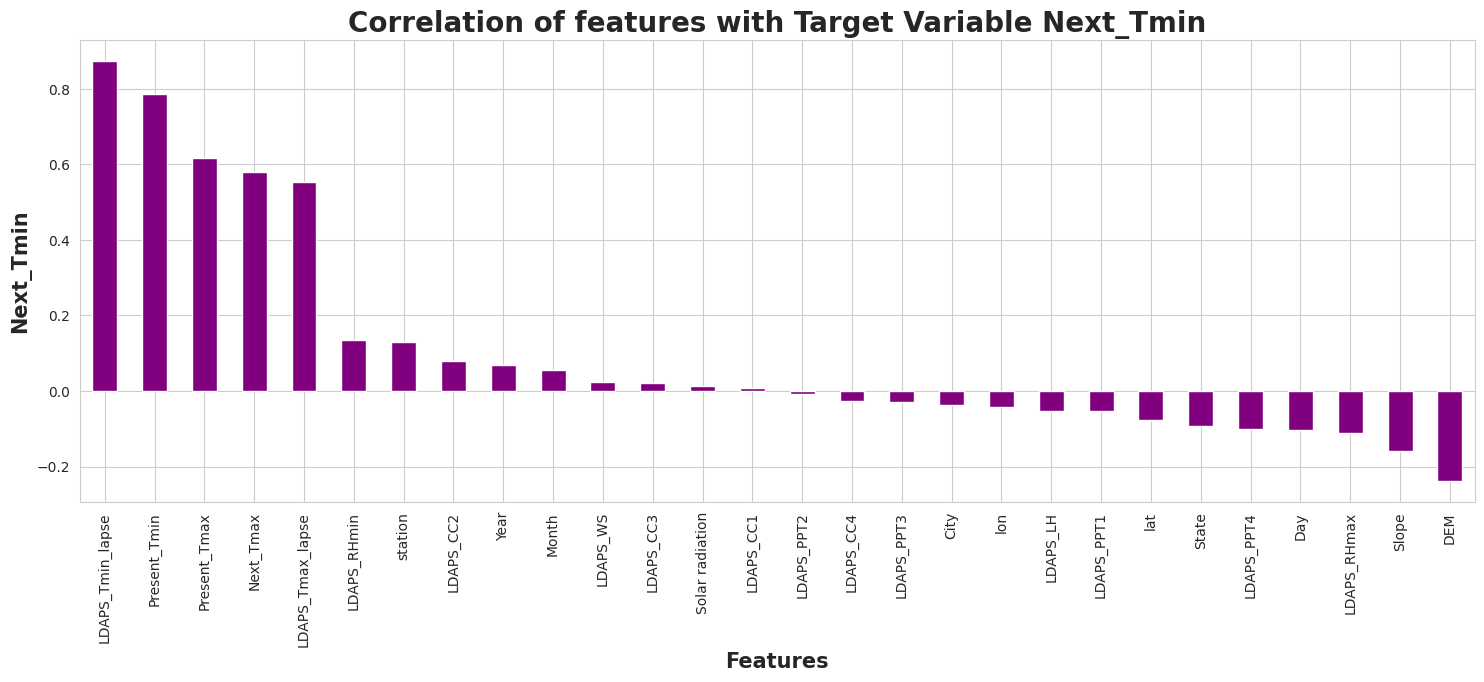

In [55]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

**Temperature related feature are moderately or highly correlated with Target Feature.**

# Model Building For Next_Tmax

## Standard Scaling

In [56]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [57]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Checking Multicollinearity between features using variance_inflation_factor

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.371722           station
1     2.903305      Present_Tmax
2     3.405399      Present_Tmin
3     6.098440       LDAPS_RHmin
4     2.609329       LDAPS_RHmax
5     6.667525  LDAPS_Tmax_lapse
6     8.263539  LDAPS_Tmin_lapse
7     1.232667          LDAPS_WS
8     1.519175          LDAPS_LH
9     4.867446         LDAPS_CC1
10    5.502914         LDAPS_CC2
11    4.571289         LDAPS_CC3
12    2.788001         LDAPS_CC4
13    2.601848        LDAPS_PPT1
14    2.168774        LDAPS_PPT2
15    1.599886        LDAPS_PPT3
16    1.602887        LDAPS_PPT4
17    1.620154               lat
18    1.292628               lon
19    4.623510               DEM
20    3.086186             Slope
21  127.563080   Solar radiation
22    5.675420         Next_Tmin
23   29.643921               Day
24  109.826097             Month
25    1.138793              Year
26    3.617181             State
27    3.642125              City

**Independent feature VIF is within permissible limit of 10**

# Principle Componant Annalysis (PCA)

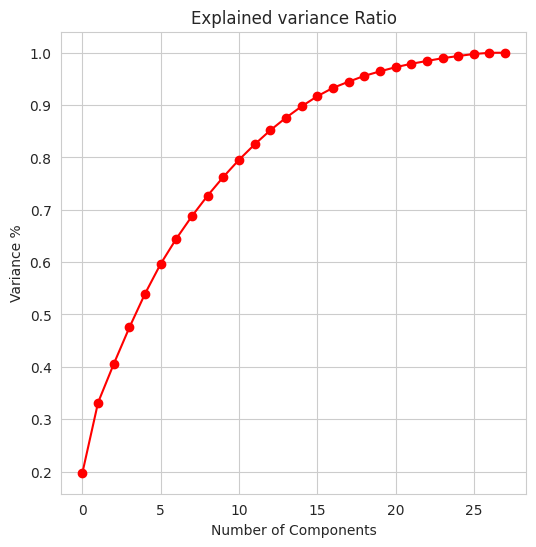

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid(True)

## Comment
**AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.**

In [60]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [61]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


## Finding best Random state

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.807779774839993 on Random_state 108


# Linear Regression Base Model

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [32.0562119  30.06822275 29.27428528 ... 25.8781114  25.10019464
 32.55957268]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [66]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.9944635694452102
Mean squared error : 1.6933572601149849
Root Mean Squared Error: 1.3012906132432467


 R2 Score :
0.807779774839993


In [67]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6626321284553206


# BaggingRegressor

In [68]:
from sklearn.ensemble import BaggingRegressor

rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('**********************************************************************')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7102985611510795
Mean squared error : 0.8978294442446049
Root Mean Squared Error: 0.9475386241439474


 R2 Score :
0.8980835397273089
**********************************************************************


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.613213579136691
Mean squared error : 0.6560050732913669
Root Mean Squared Error: 0.8099414011466305


 R2 Score :
0.9255340583678066
**********************************************************************


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0495953237410072
Mean squared error : 2.069312050359712
Root Mean Squared Error: 1.4385103580995557


 R2 Score :
0.7651035386239463
**********************************************************************


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.153453705323736
Mean squared error : 2.0046322757835107
Root Mean Squared Error: 1.4158503719614974


 R2 Score :
0.772445616474365
*********

In [69]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('**************************************************************')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6867555004361071
**************************************************************


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6909007228350873
**************************************************************


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.4077747054024532
**************************************************************


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.647776628371877
**************************************************************


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7078147787202708
**************************************************************


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable

# Final Regression Model

In [71]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred))
print('\n')



 Error in Final Model :
Mean absolute error : 0.6570321493011584
Mean squared error : 0.7776805721735247
Root Mean Squared Error: 0.8818619915687061


 R2 Score of Final Model :
0.9117221520781696




In [72]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

TypeError: swarmplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 2000x900 with 0 Axes>

# Final Regression Saving Model

In [ ]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

## Prediction According Final Regression Model

In [ ]:
# Loading the saved model
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted

# Model Building For Next_Tmin

## Standard Scaling

In [ ]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 28)
Training target vector size: (4515,)
Test feature matrix size: (2224, 28)
Test target vector size: (2224,)


## Finding best Random state

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.807779774839993 on Random_state 108


## Linear Regression Base Model

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [29.09983838 32.29826215 28.12374967 ... 32.71377091 32.38730876
 32.90634105]


Actual Wins:
 5006    28.6
947     33.4
3726    29.8
715     29.3
4242    33.0
        ... 
4097    31.9
3186    29.2
6641    30.6
3854    33.6
1190    31.8
Name: Next_Tmax, Length: 2224, dtype: float64


##Linear Regression Evaluation Matrix

In [77]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.0041890225036803
Mean squared error : 1.7389192869830647
Root Mean Squared Error: 1.3186808889883348


 R2 Score :
0.8046621657819694


In [78]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6626321284553206


## Applying other ML Models

In [79]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('*****************************************************************************')




 Error of  RandomForestRegressor() :
Mean absolute error : 0.6985400179856115
Mean squared error : 0.8536392405575534
Root Mean Squared Error: 0.9239259930089386


 R2 Score :
0.9041082345211455
*****************************************************************************


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6122504496402882
Mean squared error : 0.6460733376798561
Root Mean Squared Error: 0.8037868732940692


 R2 Score :
0.92742471288167
*****************************************************************************


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0343525179856115
Mean squared error : 2.1150719424460434
Root Mean Squared Error: 1.454328691337018


 R2 Score :
0.7624078497803464
*****************************************************************************


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.1749579088565851
Mean squared error : 2.0966148150807764
Root Mean Squared Error: 1.4479692037749892


 R2 Score :
0.7644

In [80]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('**********************************************************')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6872427810193493
**********************************************************


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.691192145572587
**********************************************************


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.4066326443849104
**********************************************************


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.64366653752654
**********************************************************


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7078866887909407
**********************************************************


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, ev

# Final Regression Model For Next_Tmin

In [81]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred))
print('\n')



 Error in Final Model :
Mean absolute error : 0.6262815216462388
Mean squared error : 0.6980548892396171
Root Mean Squared Error: 0.8354967918787104


 R2 Score of Final Model :
0.9215854748118035




 True Values Vs Predicted Value plot :


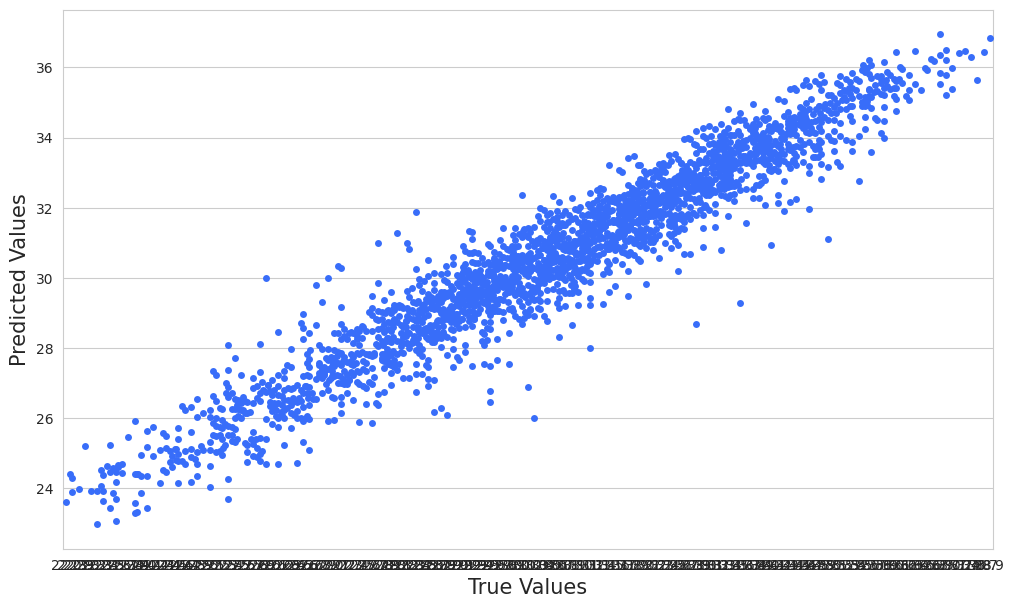

In [84]:
plt.figure(figsize=(12, 7))
y_pred = Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.show()


# Saving Final Regression Model For Next_Tmin

In [85]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

## Prediction According Final Regression Model For Next_Tmin

In [86]:
# Loading the saved model
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted

Actual Values  Predicted Values
0              28.6         28.485645
1              33.4         32.958107
2              29.8         29.554222
3              29.3         29.699396
4              33.0         33.065292
...             ...               ...
2219           31.9         32.027954
2220           29.2         29.232138
2221           30.6         31.862244
2222           33.6         33.266727
2223           31.8         32.080158

[2224 rows x 2 columns]